# Machin Learning Project

# 1. General Overview


In this project, we aim to build and evaluate regression models to predict student final grades (G3) using various student-related features. We will utilize two datasets that contain demographic, social, and academic information.

The primary objective is to compare the performance of different regression models, assess their strengths and weaknesses, and interpret which features most influence student success. This comparative analysis will allow us to identify which models are more suited to the task and understand potential reasons for their effectiveness or lack thereof.

Throughout this project, we will:
- Preprocess and analyze the data
- Train multiple regression models
- Evaluate and compare model performance using relevant metrics
- Provide insights on model behavior and prediction accuracy


# 2.Data Overview

The data used in this project comes from two CSV files:
- `student-mat.csv`: Student performance in the Mathematics course
- `student-por.csv`: Student performance in the Portuguese language course

Both datasets include 33 attributes per student, covering:
- Demographic factors (e.g., age, gender, address type)
- Academic background (e.g., parental education, previous grades)
- Social context (e.g., romantic relationship, extracurricular activities)

Despite sharing the same structure, the datasets are kept separate because they correspond to different school subjects. A notable subset of students (382 individuals) appear in both datasets. These shared entries allow for potential comparative studies between subjects, though each dataset will primarily be analyzed independently.

The target variable for our regression models is `G3`, the final grade, which ranges from 0 to 20.


## 2.1 Reading the Data

In [ ]:
#importing necessary laberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import resample

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In this step, we load both datasets into separate DataFrames using `pandas.read_csv()`.

Each dataset corresponds to student academic performance:
- `student-mat.csv` → Math performance
- `student-por.csv` → Portuguese performance

We will examine their shape and verify if they contain the same structure.

In [ ]:

# Load the datasets
math_df = pd.read_csv("student-mat.csv", sep=";")
por_df = pd.read_csv("student-por.csv", sep=";")

# Display basic information
print("Math Dataset Shape:", math_df.shape)
print("Portuguese Dataset Shape:", por_df.shape)


Math Dataset Shape: (395, 33)
Portuguese Dataset Shape: (649, 33)


In [ ]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 2.2 Exploring Dataset Attributes

### 2.2.1 Descriptions From The Provided Txt File


**The included txt file in the Data folder contains the following description about the attributes:**

**# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:**

**1** school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)  
**2** sex - student's sex (binary: "F" - female or "M" - male)  
**3** age - student's age (numeric: from 15 to 22)  
**4** address - student's home address type (binary: "U" - urban or "R" - rural)  
**5** famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)  
**6** Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)  
**7** Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
**8** Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
**9** Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
**10** Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")  
**11** reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")  
**12** guardian - student's guardian (nominal: "mother", "father" or "other")  
**13** traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
**14** studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
**15** failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
**16** schoolsup - extra educational support (binary: yes or no)  
**17** famsup - family educational support (binary: yes or no)  
**18** paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
**19** activities - extra-curricular activities (binary: yes or no)  
**20** nursery - attended nursery school (binary: yes or no)  
**21** higher - wants to take higher education (binary: yes or no)  
**22** internet - Internet access at home (binary: yes or no)  
**23** romantic - with a romantic relationship (binary: yes or no)  
**24** famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
**25** freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
**26** goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
**27** Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
**28** Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
**29** health - current health status (numeric: from 1 - very bad to 5 - very good)  
**30** absences - number of school absences (numeric: from 0 to 93)  

**These grades are related with the course subject, Math or Portuguese:**  
**31** G1 - first period grade (numeric: from 0 to 20)  
**32** G2 - second period grade (numeric: from 0 to 20)  
**33** G3 - final grade (numeric: from 0 to 20, output target)  


In [ ]:
print("Math Dataset Columns:\n", math_df.columns.tolist())
print("\nPortuguese Dataset Columns:\n", por_df.columns.tolist())


Math Dataset Columns:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Portuguese Dataset Columns:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


Upon comparing the column names of both datasets, we find they are nearly identical with **one exception**:

- **Math Dataset** contains: `paid`
- **Portuguese Dataset** contains: `fatherd`

According to the official dataset description, `paid` is a valid attribute representing **extra paid classes within the course subject**.

On the other hand, `fatherd` does not appear in the attribute list and may be a typo or data error.

 **Next Step:
We will inspect the values inside the `fatherd` column in the Portuguese dataset to determine its nature and whether we should rename it to `paid` or drop it.

###2.2.2 Fixing Inconsistent Column Name


We noticed that the Portuguese dataset is missing the `paid` column listed in the official documentation. Instead, it has a column named `fatherd` with binary values "yes"/"no", which closely resembles what we expect for `paid` (extra paid classes).

To maintain consistency between the two datasets and ensure correct alignment during analysis, we will rename `fatherd` to `paid`.


In [ ]:
# Rename 'fatherd' to 'paid' in the Portuguese dataset
por_df.rename(columns={'fatherd': 'paid'}, inplace=True)


In [ ]:
print("Math Dataset Columns:\n", math_df.columns.tolist())
print("\nPortuguese Dataset Columns:\n", por_df.columns.tolist())

Math Dataset Columns:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Portuguese Dataset Columns:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


Now that we have same features for both datasets we can  proceed with a general data cleaning

#3.General Data Cleaning

##3.1 Basic Information



We start by understanding the general structure of the datasets. This includes number of rows, columns, data types, and memory usage. It helps us identify potential issues like incorrect data types or unexpected column types.


In [ ]:
print("Math Dataset Info:")
math_df.info()


Math Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    obj



- **Rows**: 395  
- **Columns**: 33  
- **No missing values**: All columns have 395 non-null entries.  
- **Data types**:
  - 16 numeric (`int64`)
  - 17 categorical (`object`)

No nulls to handle.  
Encoding categorical features and check for outliers is needed.


In [ ]:
print("Portuguese Dataset Info:")
por_df.info()

Portuguese Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null 

- **Rows**: 649  
- **Columns**: 33  
- **No missing values**: All columns are fully populated.  
- **Data types**:
  - 16 numeric (`int64`)
  - 17 categorical (`object`)
No nulls to handle.  
Encode categorical features and detect outliers or inconsistencies is neede.


In [ ]:

print(math_df.isnull().sum().sum())       # Should return 0
print(por_df.isnull().sum().sum())        # Should return 0


0
0


##3.2 Cheking Duplicates

In [ ]:
print(math_df.duplicated().sum())
print(por_df.duplicated().sum())


0
0


Since Both Math and Portuguese datasets do not contain duplicates and null values we can continue to explore the features independently and do so enconding

# 3.Feature Relationship with Final Grade (G3)

In this section, we analyze how each categorical attribute relates to the final grade `G3`, using both Math dataset and portuguese datset first.

We will:
- Group the dataset by the attribute.
- Compute the mean and standard deviation of `G3` for each group.
- Visualize the relationship using boxplots.

This will help us evaluate if a feature is informative enough to keep for our prediction model.

Let's start with the attribute `school`.

## 3.1 Scchool Attribute

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_feature(feature, math_df, port_df):
    print(f"\n📌 Feature: {feature.upper()}")

    # Value counts
    print("\n-- Value Counts --")
    print("Math:")
    print(math_df[feature].value_counts())
    print("Portuguese:")
    print(port_df[feature].value_counts())

    # Groupby G3 Mean & Std
    print("\n-- G3 Mean --")
    print("Math:")
    print(math_df.groupby(feature)['G3'].mean())
    print("Portuguese:")
    print(port_df.groupby(feature)['G3'].mean())

    print("\n-- G3 Std --")
    print("Math:")
    print(math_df.groupby(feature)['G3'].std())
    print("Portuguese:")
    print(port_df.groupby(feature)['G3'].std())

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.boxplot(data=math_df, x=feature, y='G3', ax=axes[0])
    axes[0].set_title(f'Math: G3 by {feature}')

    sns.boxplot(data=port_df, x=feature, y='G3', ax=axes[1])
    axes[1].set_title(f'Portuguese: G3 by {feature}')

    plt.tight_layout()
    plt.show()



📌 Feature: SCHOOL

-- Value Counts --
Math:
school
GP    349
MS     46
Name: count, dtype: int64
Portuguese:
school
GP    423
MS    226
Name: count, dtype: int64

-- G3 Mean --
Math:
school
GP    10.489971
MS     9.847826
Name: G3, dtype: float64
Portuguese:
school
GP    12.576832
MS    10.650442
Name: G3, dtype: float64

-- G3 Std --
Math:
school
GP    4.625397
MS    4.237229
Name: G3, dtype: float64
Portuguese:
school
GP    2.625636
MS    3.833991
Name: G3, dtype: float64


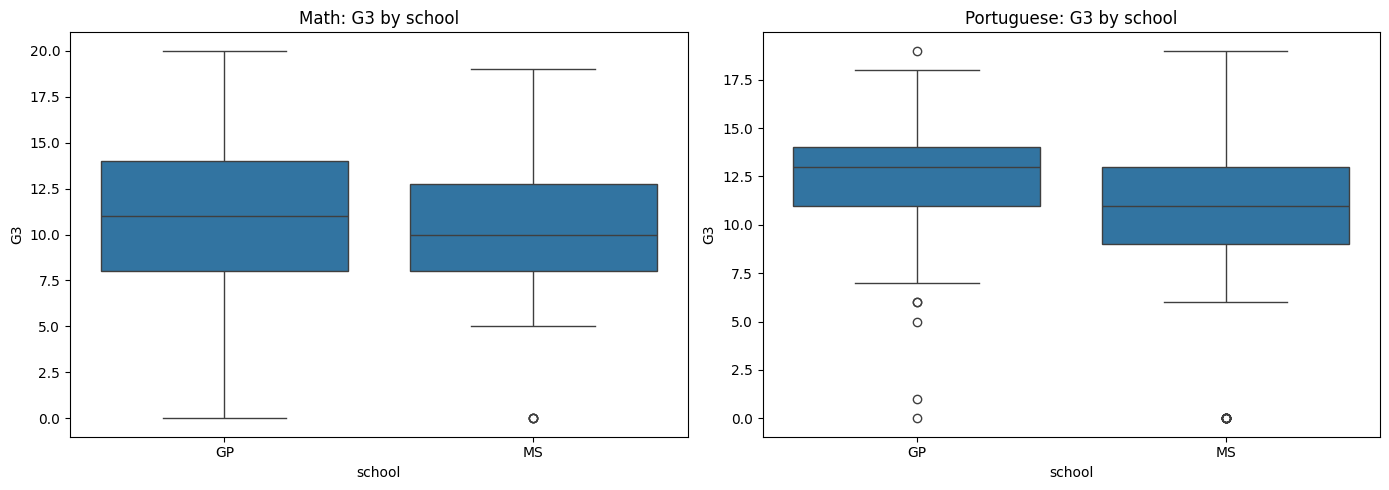

In [ ]:
analyze_feature('school', math_df, por_df)


### Analysis

**Math Dataset**  
- Similar mean G3 scores: GP (10.49), MS (9.85) → weak distinction.  
- High standard deviation in both → wide variation in student performance.  
 **Drop** this feature for Math.

**Portuguese Dataset**  
- GP has higher mean G3 (12.58 vs 10.65) → better performance.  
- Lower std in GP → more consistent results.  
 **Keep** this feature for Portuguese.

### Decision

we drop this feature

## 3.2 Sex Attribute


📌 Feature: SEX

-- Value Counts --
Math:
sex
F    208
M    187
Name: count, dtype: int64
Portuguese:
sex
F    383
M    266
Name: count, dtype: int64

-- G3 Mean --
Math:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64
Portuguese:
sex
F    12.253264
M    11.406015
Name: G3, dtype: float64

-- G3 Std --
Math:
sex
F    4.622338
M    4.495297
Name: G3, dtype: float64
Portuguese:
sex
F    3.124147
M    3.320690
Name: G3, dtype: float64


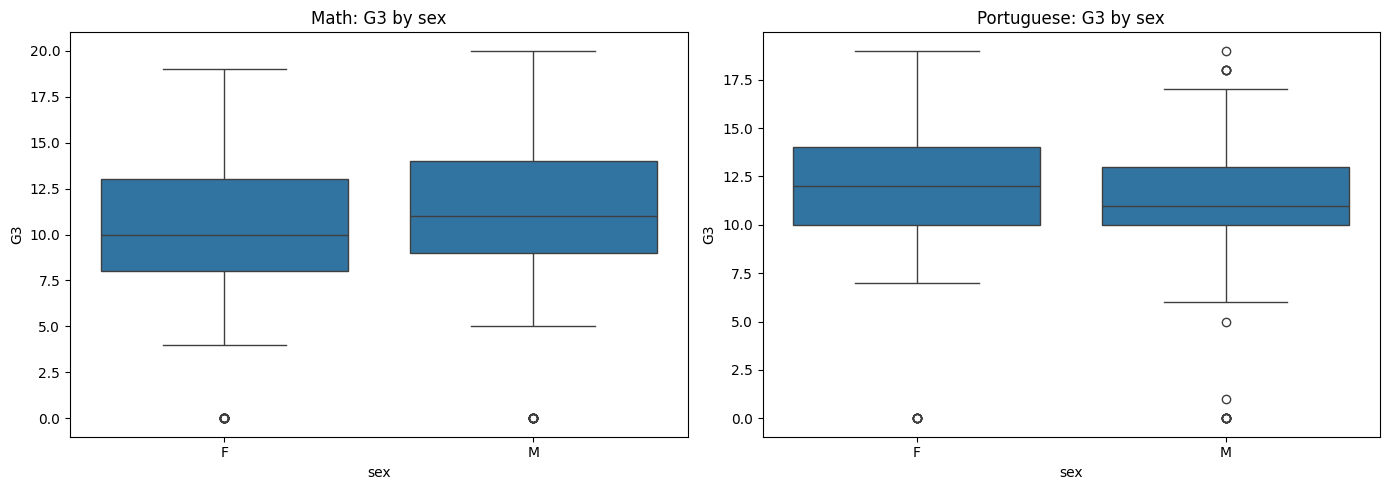

In [ ]:
analyze_feature('sex', math_df, por_df)


###Analysis

**Math Dataset**:
  - Males (M) have a higher mean G3 score (10.91) compared to females (F) (9.97).
  - The standard deviation for both genders is similar, indicating a comparable spread in scores for both.

**Portuguese Dataset**:
  - Females (F) have a higher mean G3 score (12.25) than males (M) (11.41).
  - The standard deviation is lower for both genders, suggesting more consistent performance.

There is a gender-based performance difference in both subjects:
- **Math**: Males tend to perform better.
- **Portuguese**: Females tend to perform better.

This insight could be valuable for targeted interventions, such as providing additional resources or support for the gender that tends to score lower in each subject.

###Decision

We keep it for both subjects

## 3.3 Age Attribute  


📌 Feature: AGE

-- Value Counts --
Math:
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64
Portuguese:
age
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: count, dtype: int64

-- G3 Mean --
Math:
age
15    11.256098
16    11.028846
17    10.275510
18     9.548780
19     8.208333
20    14.000000
21     7.000000
22     8.000000
Name: G3, dtype: float64
Portuguese:
age
15    12.107143
16    11.994350
17    12.268156
18    11.771429
19     9.531250
20    12.000000
21    11.000000
22     5.000000
Name: G3, dtype: float64

-- G3 Std --
Math:
age
15    4.596861
16    4.282402
17    4.290437
18    4.994200
19    4.606037
20    4.582576
21         NaN
22         NaN
Name: G3, dtype: float64
Portuguese:
age
15    2.085372
16    2.883135
17    3.149040
18    4.154122
19    3.407623
20    2.449490
21    1.414214
22         NaN
Name: G3, dtype: float64


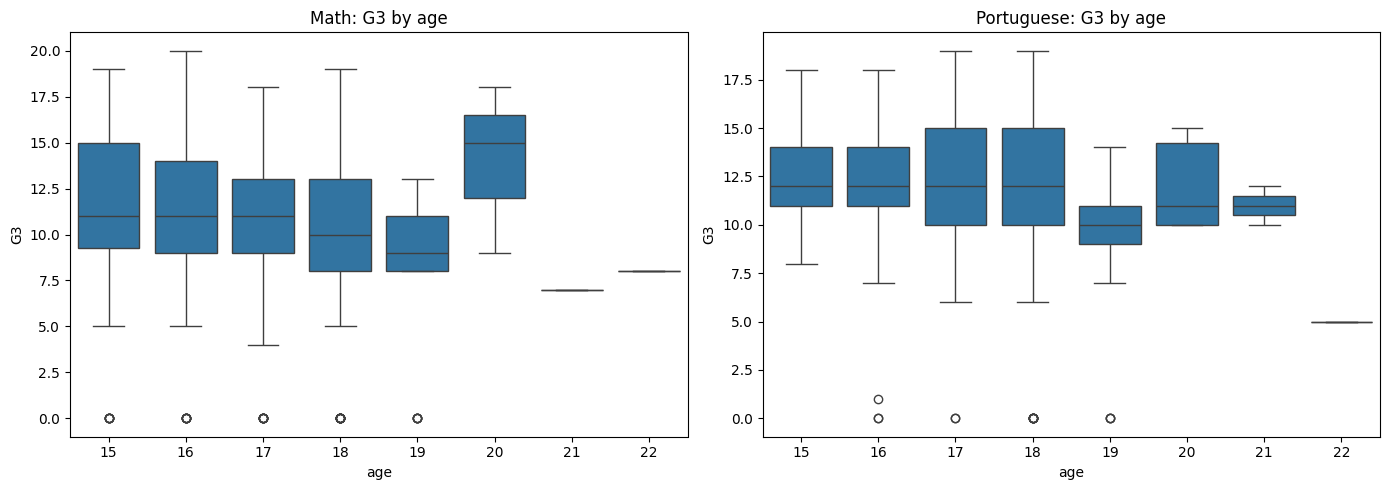

In [ ]:
analyze_feature('age', math_df, por_df)


### Analysis


- **Math Dataset**:
  - Very different grade averages across all ages. This suggests age has a notable influence on grade performance.
  
- **Portuguese Dataset**:
  - Ages 15-18 show very similar grade performance, with no significant differences in approval rates.
  - From age 19 and above, grades begin to vary significantly, with older students showing more variation in performance.
  - For students aged 22, the lower grades may indicate a higher rate of evasion (dropout), which could affect the overall grade average for this group.



### Decision

- The **age** feature should be kept as it provides useful information about performance across different age groups.



## 3.4 Address Attribute  


📌 Feature: ADDRESS

-- Value Counts --
Math:
address
U    307
R     88
Name: count, dtype: int64
Portuguese:
address
U    452
R    197
Name: count, dtype: int64

-- G3 Mean --
Math:
address
R     9.511364
U    10.674267
Name: G3, dtype: float64
Portuguese:
address
R    11.086294
U    12.263274
Name: G3, dtype: float64

-- G3 Std --
Math:
address
R    4.556149
U    4.563075
Name: G3, dtype: float64
Portuguese:
address
R    3.605221
U    2.987658
Name: G3, dtype: float64


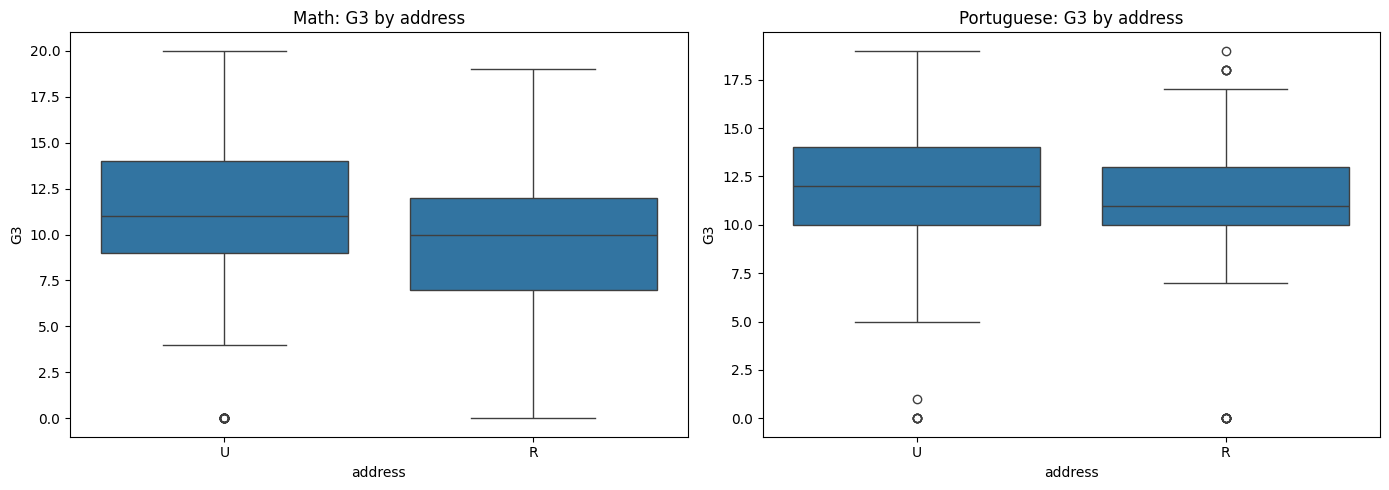

In [ ]:
analyze_feature('address', math_df, por_df)


### Analysis

for both subjects we can see that Rural students tend to perform a bit worse.

### Decision

we will keep this attribute for both datasets

## 3.5 Famsize Attribute  


📌 Feature: FAMSIZE

-- Value Counts --
Math:
famsize
GT3    281
LE3    114
Name: count, dtype: int64
Portuguese:
famsize
GT3    457
LE3    192
Name: count, dtype: int64

-- G3 Mean --
Math:
famsize
GT3    10.177936
LE3    11.000000
Name: G3, dtype: float64
Portuguese:
famsize
GT3    11.811816
LE3    12.130208
Name: G3, dtype: float64

-- G3 Std --
Math:
famsize
GT3    4.704520
LE3    4.225921
Name: G3, dtype: float64
Portuguese:
famsize
GT3    3.351426
LE3    2.919285
Name: G3, dtype: float64


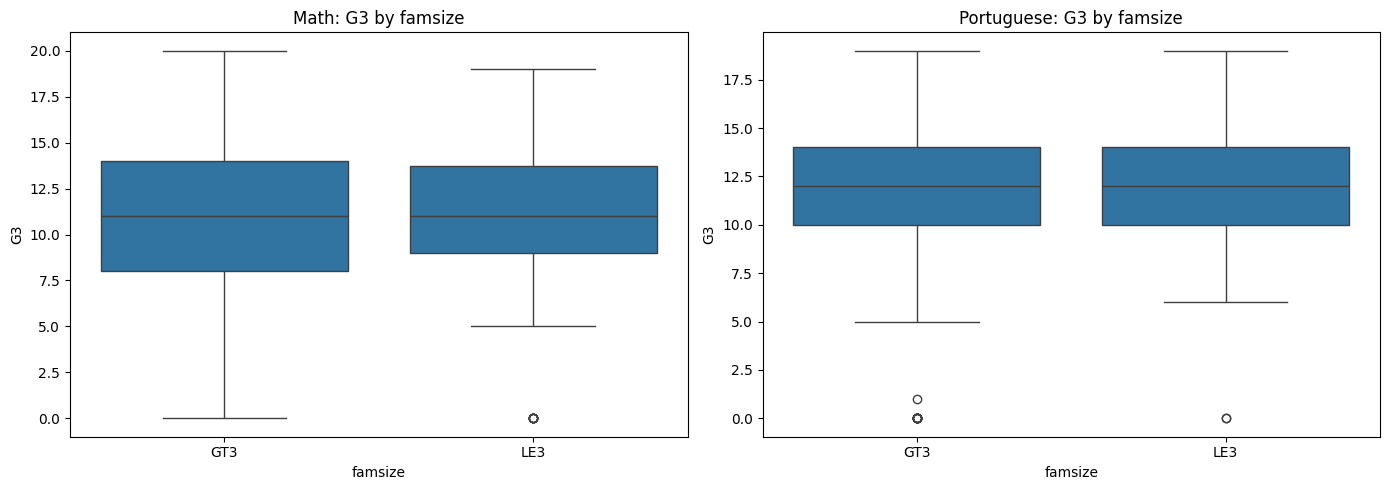

In [ ]:
analyze_feature('famsize', math_df, por_df)


###Analysis

This feature seems to not be useful, there's no great differente between students with different family sizes (Specially in Portuguese).

###Decision

we will drop this feature

## 3.6 Parental Status


📌 Feature: PSTATUS

-- Value Counts --
Math:
Pstatus
T    354
A     41
Name: count, dtype: int64
Portuguese:
Pstatus
T    569
A     80
Name: count, dtype: int64

-- G3 Mean --
Math:
Pstatus
A    11.195122
T    10.324859
Name: G3, dtype: float64
Portuguese:
Pstatus
A    11.912500
T    11.905097
Name: G3, dtype: float64

-- G3 Std --
Math:
Pstatus
A    4.290801
T    4.611121
Name: G3, dtype: float64
Portuguese:
Pstatus
A    3.222523
T    3.234626
Name: G3, dtype: float64


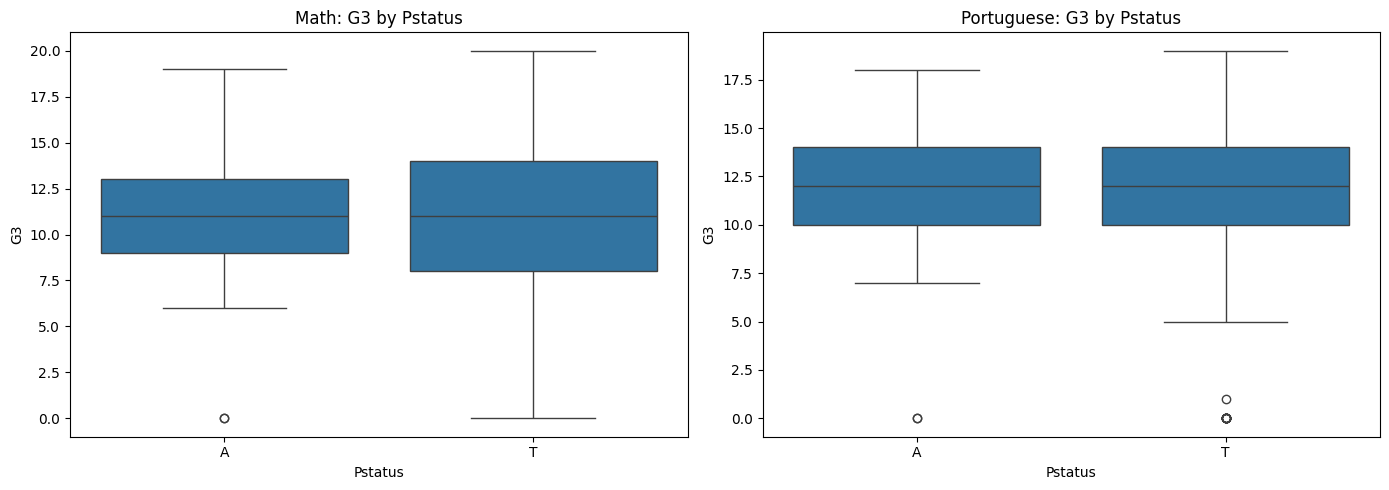

In [ ]:
analyze_feature('Pstatus', math_df, por_df)


###Analysis

This is very similar to the previous feature, math has a higher variance, but very close mean. Pstatus will be removed

###Decision

this feature will be removed

## 3.7 Medu Attribute


📌 Feature: MEDU

-- Value Counts --
Math:
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64
Portuguese:
Medu
2    186
4    175
1    143
3    139
0      6
Name: count, dtype: int64

-- G3 Mean --
Math:
Medu
0    13.000000
1     8.677966
2     9.728155
3    10.303030
4    11.763359
Name: G3, dtype: float64
Portuguese:
Medu
0    11.666667
1    10.797203
2    11.661290
3    11.920863
4    13.068571
Name: G3, dtype: float64

-- G3 Std --
Math:
Medu
0    3.464102
1    4.364594
2    4.636163
3    4.623486
4    4.267646
Name: G3, dtype: float64
Portuguese:
Medu
0    1.751190
1    3.163523
2    3.061232
3    3.123229
4    3.236978
Name: G3, dtype: float64


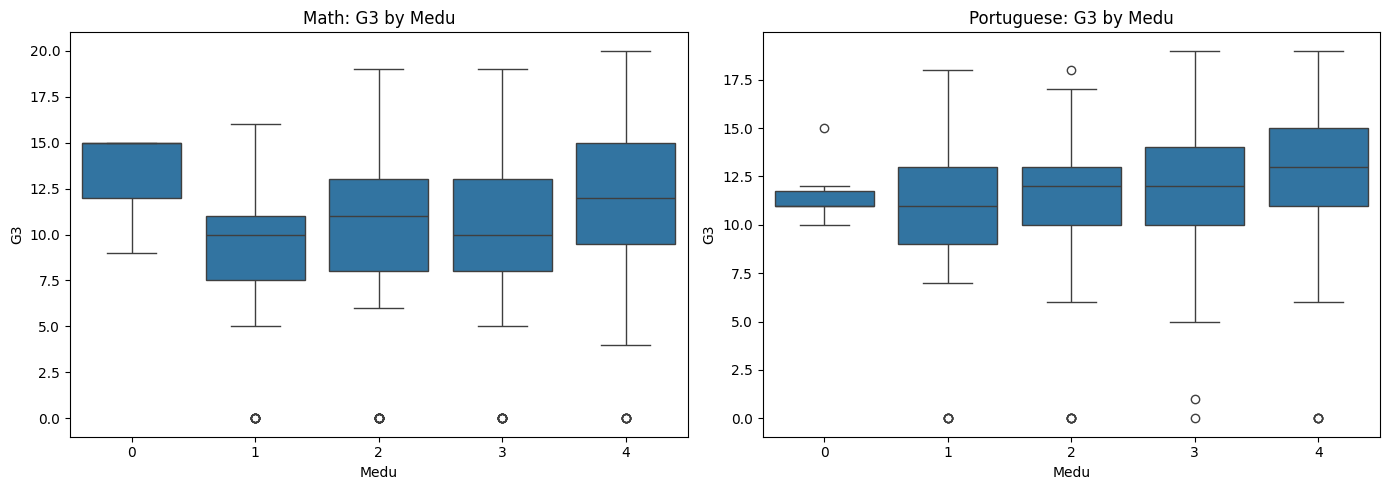

In [ ]:
analyze_feature('Medu', math_df, por_df)


###Analysis

Overall We can notice that the higher the mother education the better the grade of the student is, in both subjects

###Decision

we will keep this feature

## 3.8 Fedu Attribute  


📌 Feature: FEDU

-- Value Counts --
Math:
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
Portuguese:
Fedu
2    209
1    174
3    131
4    128
0      7
Name: count, dtype: int64

-- G3 Mean --
Math:
Fedu
0    13.000000
1     9.158537
2    10.260870
3    10.660000
4    11.364583
Name: G3, dtype: float64
Portuguese:
Fedu
0    12.142857
1    10.936782
2    11.784689
3    12.381679
4    12.921875
Name: G3, dtype: float64

-- G3 Std --
Math:
Fedu
0    4.242641
1    4.563596
2    4.733396
3    4.149285
4    4.665934
Name: G3, dtype: float64
Portuguese:
Fedu
0    2.794553
1    3.424077
2    3.448321
3    2.491394
4    2.915096
Name: G3, dtype: float64


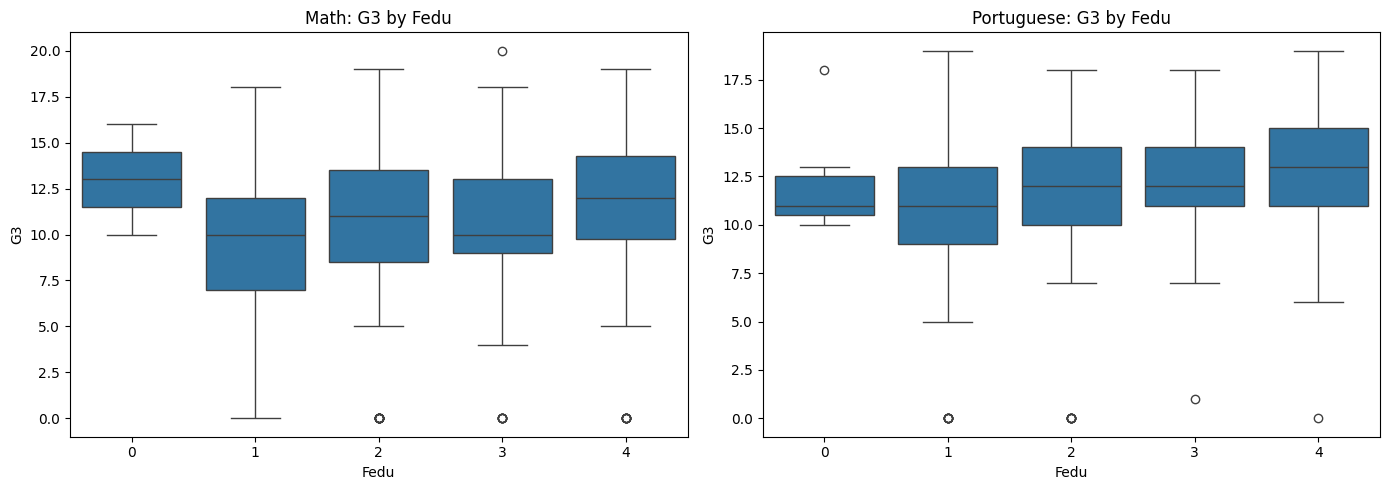

In [ ]:
analyze_feature('Fedu', math_df, por_df)

### Analysis

Similar to the mother education

### Decision

Fedu feature will be kept

## 3.9 Mjob Attribute  


📌 Feature: MJOB

-- Value Counts --
Math:
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
Portuguese:
Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64

-- G3 Mean --
Math:
Mjob
at_home      9.152542
health      12.147059
other        9.822695
services    11.019417
teacher     11.051724
Name: G3, dtype: float64
Portuguese:
Mjob
at_home     11.044444
health      13.062500
other       11.670543
services    12.147059
teacher     13.138889
Name: G3, dtype: float64

-- G3 Std --
Math:
Mjob
at_home     4.733642
health      4.229280
other       4.359364
services    4.758853
teacher     4.398654
Name: G3, dtype: float64
Portuguese:
Mjob
at_home     3.138273
health      2.956466
other       3.307224
services    2.917456
teacher     3.307293
Name: G3, dtype: float64


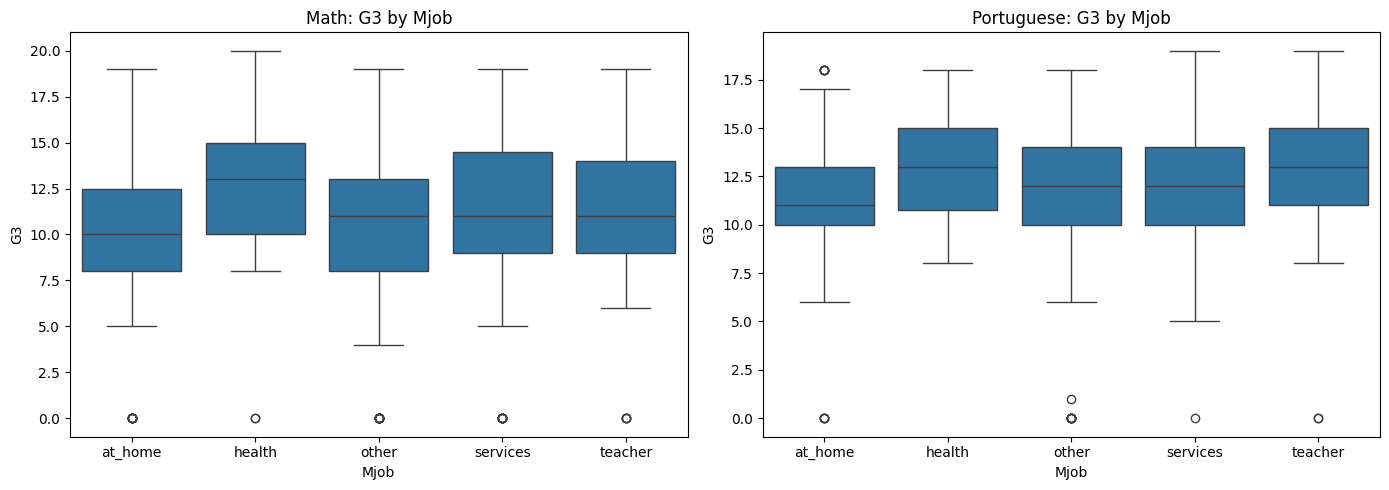

In [ ]:
analyze_feature('Mjob', math_df, por_df)

### Analysis

We can notice some useful varinace in both subjects indicating that the mother job affects the grade of the student directly

### Decision

keep this feature

## 3.10 Fjob Attribute  


📌 Feature: FJOB

-- Value Counts --
Math:
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64
Portuguese:
Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: count, dtype: int64

-- G3 Mean --
Math:
Fjob
at_home     10.150000
health      11.611111
other       10.193548
services    10.297297
teacher     11.965517
Name: G3, dtype: float64
Portuguese:
Fjob
at_home     11.428571
health      12.565217
other       11.891008
services    11.629834
teacher     13.583333
Name: G3, dtype: float64

-- G3 Std --
Math:
Fjob
at_home     5.323978
health      3.238353
other       4.511236
services    4.477407
teacher     5.486885
Name: G3, dtype: float64
Portuguese:
Fjob
at_home     3.201698
health      3.130874
other       3.074503
services    3.438507
teacher     3.400630
Name: G3, dtype: float64


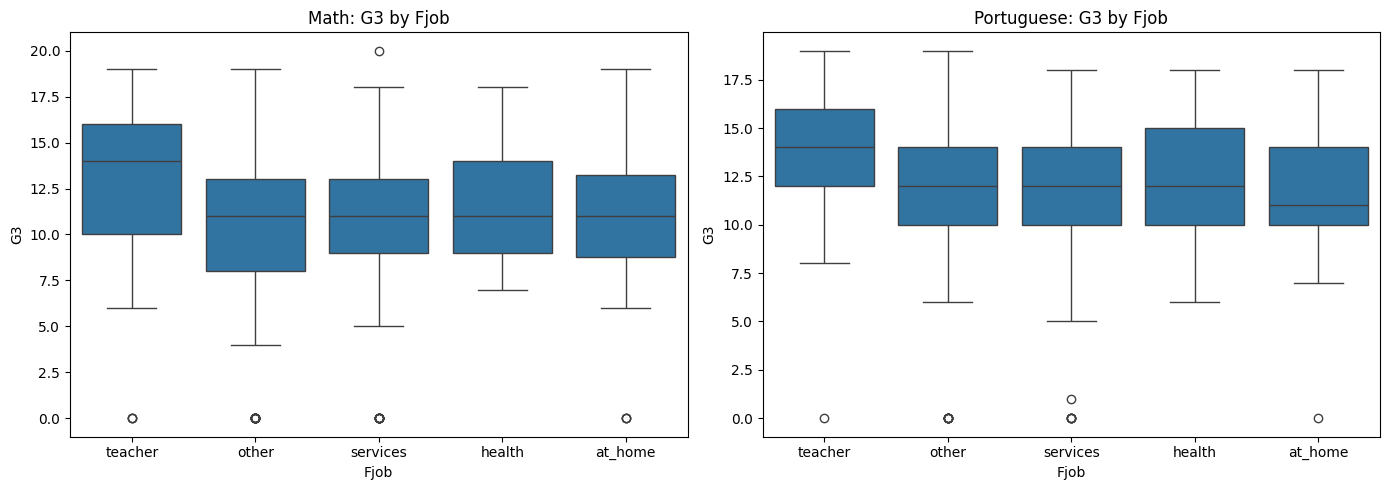

In [ ]:
analyze_feature('Fjob', math_df, por_df)

### Analysis

the father job has less effect than the mother job, notice that in the teacher value the grade is higher than all of the other jobs we may use this to edit the feature to have only two values :teacher or other

### Decision

keep this feature

## 3.11 Reason Attribute


📌 Feature: REASON

-- Value Counts --
Math:
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64
Portuguese:
reason
course        285
home          149
reputation    143
other          72
Name: count, dtype: int64

-- G3 Mean --
Math:
reason
course         9.820690
home          10.256881
other         11.166667
reputation    11.142857
Name: G3, dtype: float64
Portuguese:
reason
course        11.547368
home          12.181208
other         10.694444
reputation    12.944056
Name: G3, dtype: float64

-- G3 Std --
Math:
reason
course        4.878623
home          4.643601
other         3.760699
reputation    4.261700
Name: G3, dtype: float64
Portuguese:
reason
course        3.108717
home          2.952447
other         3.931236
reputation    3.052997
Name: G3, dtype: float64


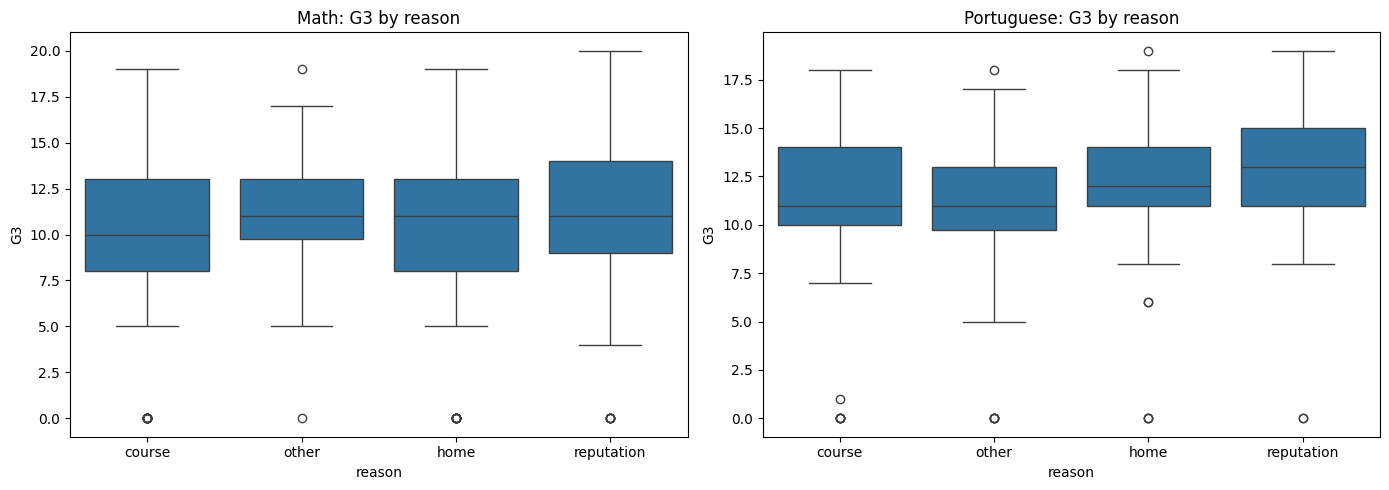

In [ ]:
analyze_feature('reason', math_df, por_df)


###Analysis


it seems that the in general all the diffrent values for reason are similar so no useful varinace is noticed

### Decision

we will remove this feature

## 3.12 Guardian Attribute  


📌 Feature: GUARDIAN

-- Value Counts --
Math:
guardian
mother    273
father     90
other      32
Name: count, dtype: int64
Portuguese:
guardian
mother    455
father    153
other      41
Name: count, dtype: int64

-- G3 Mean --
Math:
guardian
father    10.688889
mother    10.483516
other      9.062500
Name: G3, dtype: float64
Portuguese:
guardian
father    12.202614
mother    11.896703
other     10.902439
Name: G3, dtype: float64

-- G3 Std --
Math:
guardian
father    4.463697
mother    4.597064
other     4.689986
Name: G3, dtype: float64
Portuguese:
guardian
father    3.192012
mother    3.279943
other     2.624927
Name: G3, dtype: float64


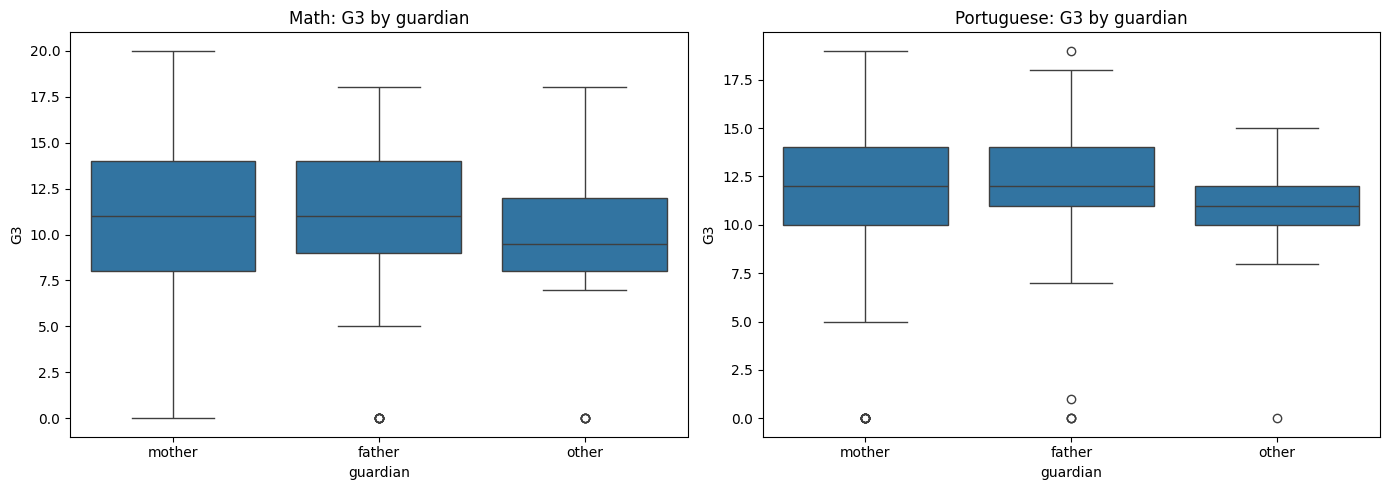

In [ ]:
analyze_feature('guardian', math_df, por_df)

### Analysis

the means are very similar if either the mother or the father are guardian and it clearly increases if other are guardian so grouping the mother and the father + keeping other would help our analysis

### Decision

keep this feature and edit it

## 3.13 Traveltime Attribute


📌 Feature: TRAVELTIME

-- Value Counts --
Math:
traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64
Portuguese:
traveltime
1    366
2    213
3     54
4     16
Name: count, dtype: int64

-- G3 Mean --
Math:
traveltime
1    10.782101
2     9.906542
3     9.260870
4     8.750000
Name: G3, dtype: float64
Portuguese:
traveltime
1    12.251366
2    11.577465
3    11.166667
4    10.875000
Name: G3, dtype: float64

-- G3 Std --
Math:
traveltime
1    4.523289
2    4.600108
3    5.074154
4    3.918819
Name: G3, dtype: float64
Portuguese:
traveltime
1    3.113767
2    3.422988
3    3.272239
4    1.995829
Name: G3, dtype: float64


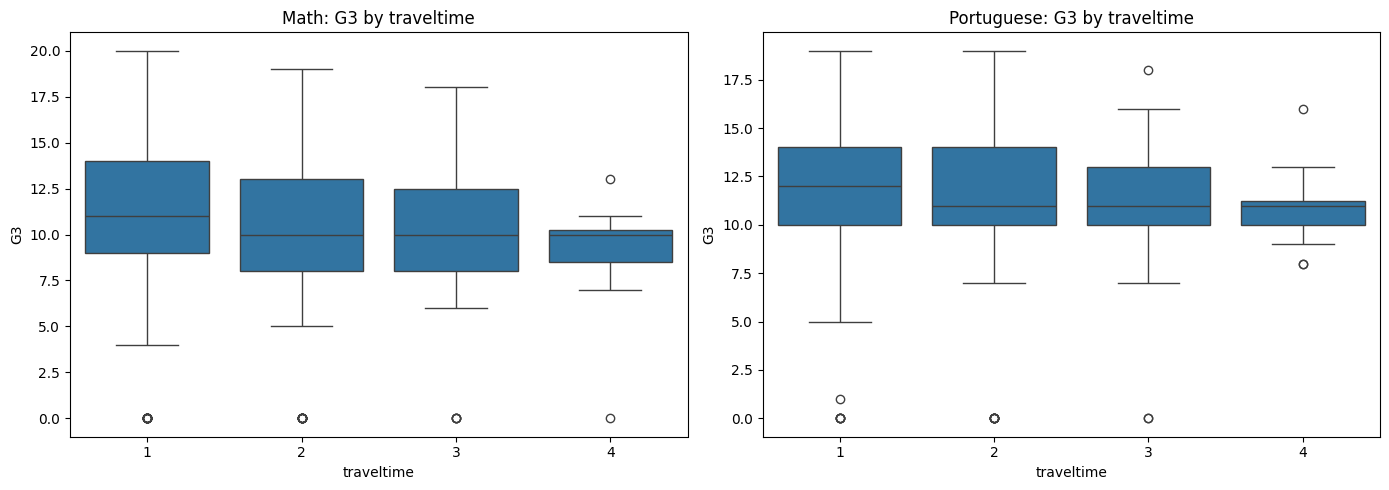

In [ ]:
analyze_feature('traveltime', math_df, por_df)

###Analysis

for the values (2, 3 and 4) meaning more than 15 min to make it to school the mean is similar and there is no difference but for the value 1 (student close to school) the mean is always higher

###Decision

keep this feature and edit it to have 1  or 2 (for the other values)

## 3.14 Studytime Attribute


📌 Feature: STUDYTIME

-- Value Counts --
Math:
studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64
Portuguese:
studytime
2    305
1    212
3     97
4     35
Name: count, dtype: int64

-- G3 Mean --
Math:
studytime
1    10.047619
2    10.171717
3    11.400000
4    11.259259
Name: G3, dtype: float64
Portuguese:
studytime
1    10.844340
2    12.091803
3    13.226804
4    13.057143
Name: G3, dtype: float64

-- G3 Std --
Math:
studytime
1    4.956311
2    4.217537
3    4.639504
4    5.281263
Name: G3, dtype: float64
Portuguese:
studytime
1    3.218624
2    3.243125
3    2.502104
4    3.038410
Name: G3, dtype: float64


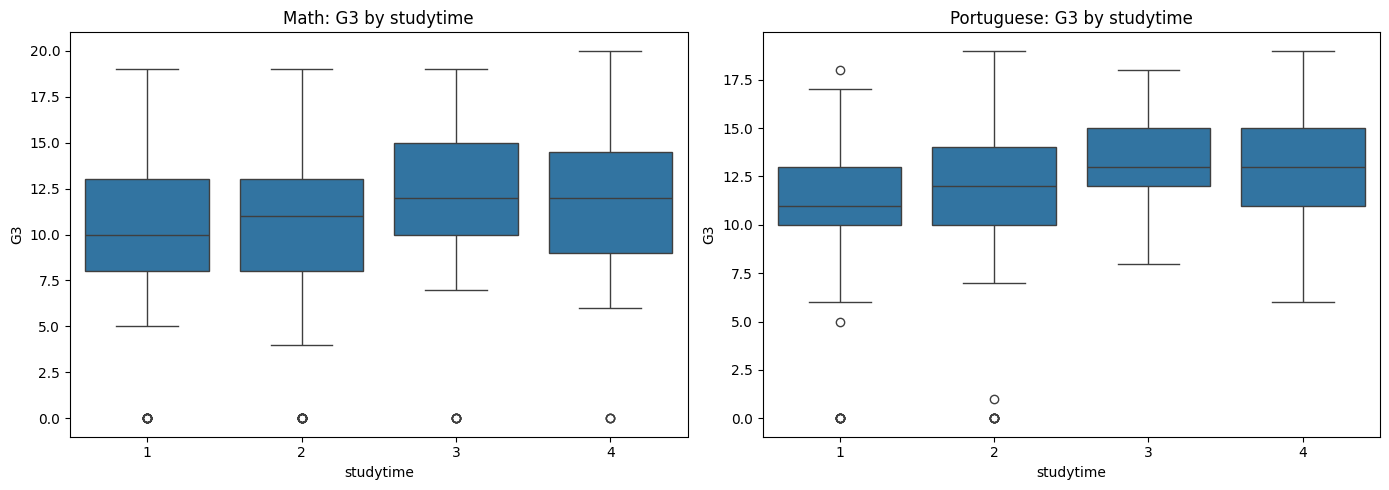

In [ ]:
analyze_feature('studytime', math_df, por_df)

### Analysis

the more the student study the higher the grade is but after 3(5-10 hours) there is no difference in the mean

### Decision

keep the feature just group the values 3 and 4 in to 3

## 3.15 Failures Attribute


📌 Feature: FAILURES

-- Value Counts --
Math:
failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64
Portuguese:
failures
0    549
1     70
2     16
3     14
Name: count, dtype: int64

-- G3 Mean --
Math:
failures
0    11.253205
1     8.120000
2     6.235294
3     5.687500
Name: G3, dtype: float64
Portuguese:
failures
0    12.510018
1     8.642857
2     8.812500
3     8.071429
Name: G3, dtype: float64

-- G3 Std --
Math:
failures
0    4.169633
1    4.710561
2    4.841609
3    4.190764
Name: G3, dtype: float64
Portuguese:
failures
0    2.828813
1    3.443270
2    3.208712
3    2.786348
Name: G3, dtype: float64


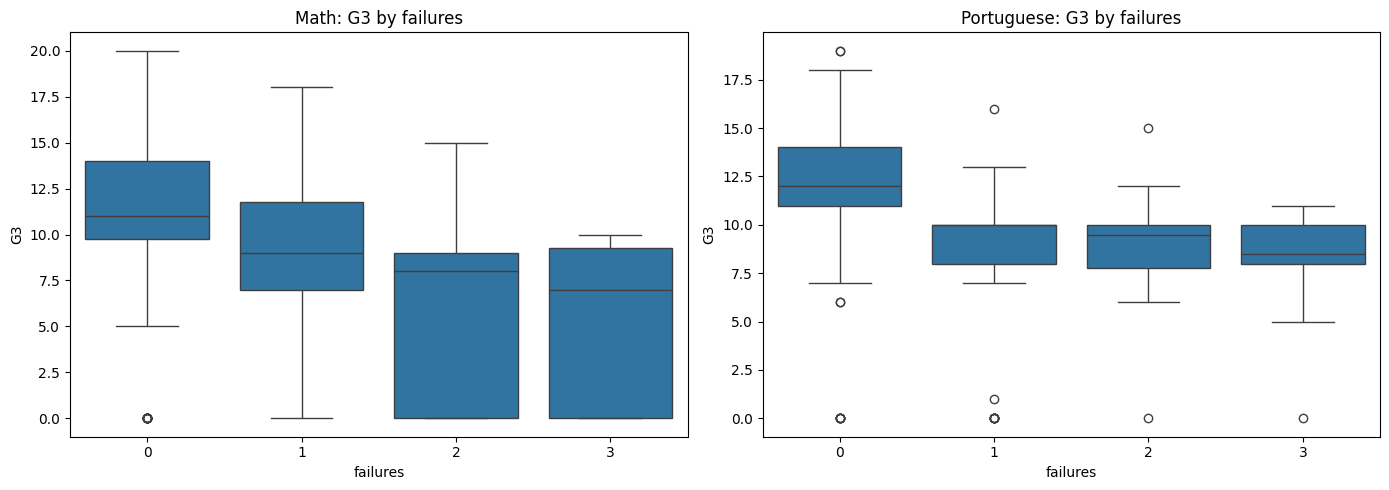

In [ ]:
analyze_feature('failures', math_df, por_df)

### Analysis

the more the student fails the smaller the grade is

### Decision

We will keepp this feature and watch out for the big variance in math data for more than 2 failures

## 3.16 Schoolsup Attribute  


📌 Feature: SCHOOLSUP

-- Value Counts --
Math:
schoolsup
no     344
yes     51
Name: count, dtype: int64
Portuguese:
schoolsup
no     581
yes     68
Name: count, dtype: int64

-- G3 Mean --
Math:
schoolsup
no     10.561047
yes     9.431373
Name: G3, dtype: float64
Portuguese:
schoolsup
no     11.979346
yes    11.279412
Name: G3, dtype: float64

-- G3 Std --
Math:
schoolsup
no     4.769533
yes    2.865344
Name: G3, dtype: float64
Portuguese:
schoolsup
no     3.316040
yes    2.304088
Name: G3, dtype: float64


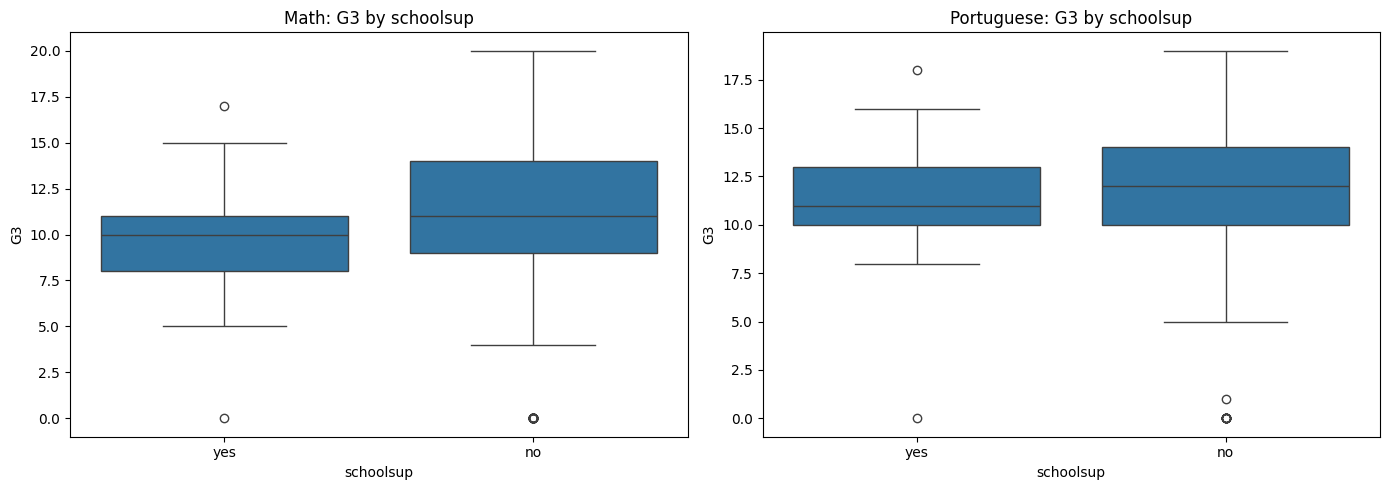

In [ ]:
analyze_feature('schoolsup', math_df, por_df)

### Analysis

clearly the lower the grade the more school support is needed

###Decision

keep this feature

## 3.17 Famsup Attribute


📌 Feature: FAMSUP

-- Value Counts --
Math:
famsup
yes    242
no     153
Name: count, dtype: int64
Portuguese:
famsup
yes    398
no     251
Name: count, dtype: int64

-- G3 Mean --
Math:
famsup
no     10.640523
yes    10.272727
Name: G3, dtype: float64
Portuguese:
famsup
no     11.665339
yes    12.057789
Name: G3, dtype: float64

-- G3 Std --
Math:
famsup
no     4.636262
yes    4.550318
Name: G3, dtype: float64
Portuguese:
famsup
no     3.602160
yes    2.967358
Name: G3, dtype: float64


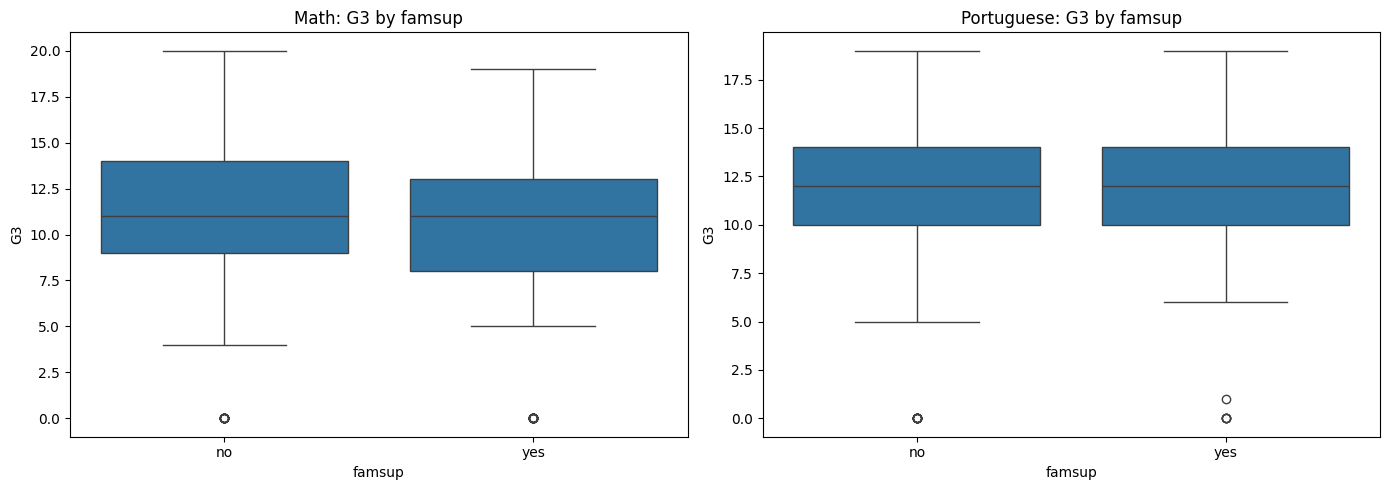

In [ ]:
analyze_feature('famsup', math_df, por_df)

### Analysis

there is no big diffrence in the two different values of this feature

### Decision

Remove this feature

## 3.18 Paid/Fatherd Attribute


📌 Feature: PAID

-- Value Counts --
Math:
paid
no     214
yes    181
Name: count, dtype: int64
Portuguese:
paid
no     610
yes     39
Name: count, dtype: int64

-- G3 Mean --
Math:
paid
no      9.985981
yes    10.922652
Name: G3, dtype: float64
Portuguese:
paid
no     11.950820
yes    11.205128
Name: G3, dtype: float64

-- G3 Std --
Math:
paid
no     5.126090
yes    3.791011
Name: G3, dtype: float64
Portuguese:
paid
no     3.250496
yes    2.848633
Name: G3, dtype: float64


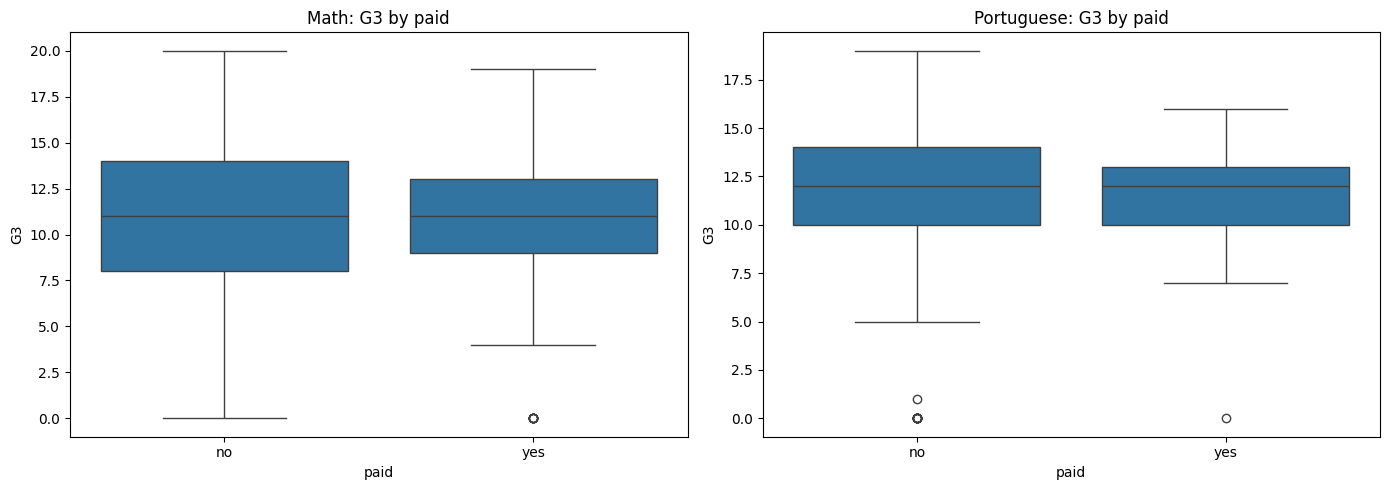

In [ ]:
analyze_feature('paid', math_df, por_df)

### Analysis

a similar mean but slightly different variance yet we will remove this feature

### Decision

Remove this feature

##3.19 Activities Attribute


📌 Feature: ACTIVITIES

-- Value Counts --
Math:
activities
yes    201
no     194
Name: count, dtype: int64
Portuguese:
activities
no     334
yes    315
Name: count, dtype: int64

-- G3 Mean --
Math:
activities
no     10.340206
yes    10.487562
Name: G3, dtype: float64
Portuguese:
activities
no     11.718563
yes    12.104762
Name: G3, dtype: float64

-- G3 Std --
Math:
activities
no     4.488065
yes    4.679861
Name: G3, dtype: float64
Portuguese:
activities
no     3.235290
yes    3.218944
Name: G3, dtype: float64


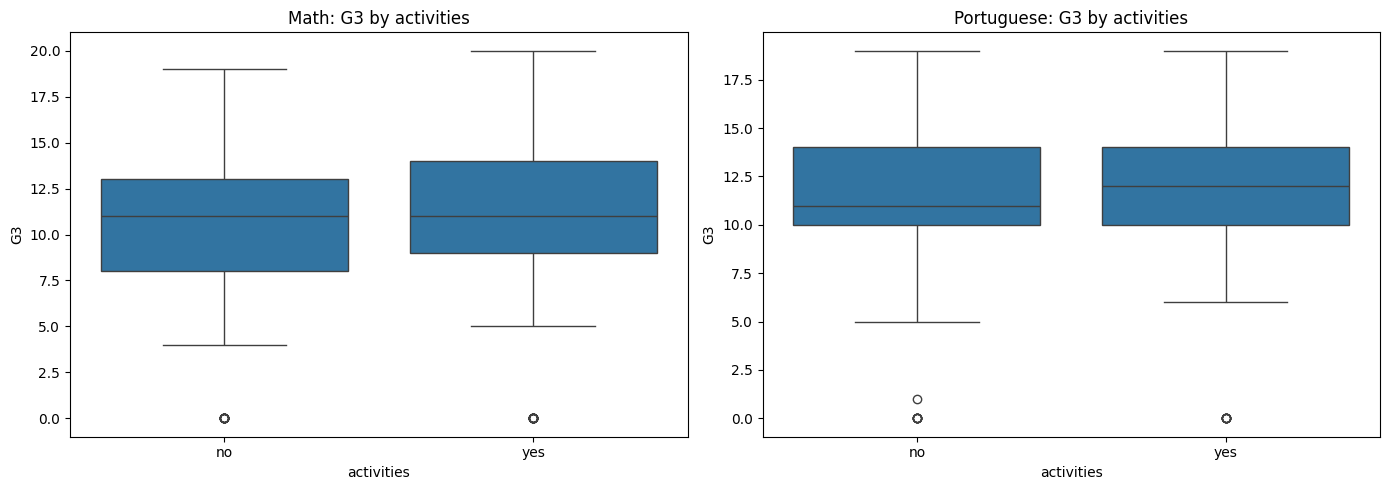

In [ ]:
analyze_feature('activities', math_df, por_df)

### Analysis

The feature doesn't seem to add on the math data, but it has a bigger difference on in the port data. Remove activities feature from math dataset and maintain in the portuguese

### Decision

Remove activities feature from math dataset and maintain in the portuguese

## 3.20 Nursery Attribute


📌 Feature: NURSERY

-- Value Counts --
Math:
nursery
yes    314
no      81
Name: count, dtype: int64
Portuguese:
nursery
yes    521
no     128
Name: count, dtype: int64

-- G3 Mean --
Math:
nursery
no      9.950617
yes    10.535032
Name: G3, dtype: float64
Portuguese:
nursery
no     11.718750
yes    11.952015
Name: G3, dtype: float64

-- G3 Std --
Math:
nursery
no     4.560431
yes    4.586449
Name: G3, dtype: float64
Portuguese:
nursery
no     3.006391
yes    3.284521
Name: G3, dtype: float64


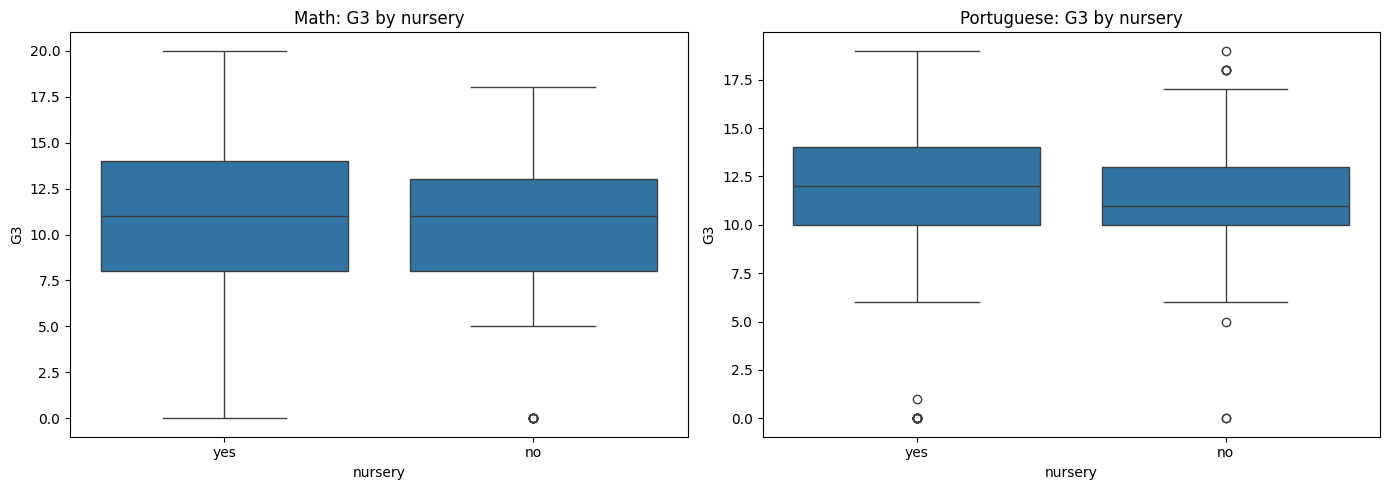

In [ ]:
analyze_feature('nursery', math_df, por_df)

### Analysis

The feature doesn't seem to add on the math data, but it has a bigger difference on in the port data.

### Decision

Remove nursery feature from math dataset and maintain in the portuguese

## 3.21 Higher Attribute


📌 Feature: HIGHER

-- Value Counts --
Math:
higher
yes    375
no      20
Name: count, dtype: int64
Portuguese:
higher
yes    580
no      69
Name: count, dtype: int64

-- G3 Mean --
Math:
higher
no      6.800
yes    10.608
Name: G3, dtype: float64
Portuguese:
higher
no      8.797101
yes    12.275862
Name: G3, dtype: float64

-- G3 Std --
Math:
higher
no     4.829732
yes    4.493422
Name: G3, dtype: float64
Portuguese:
higher
no     2.973311
yes    3.058402
Name: G3, dtype: float64


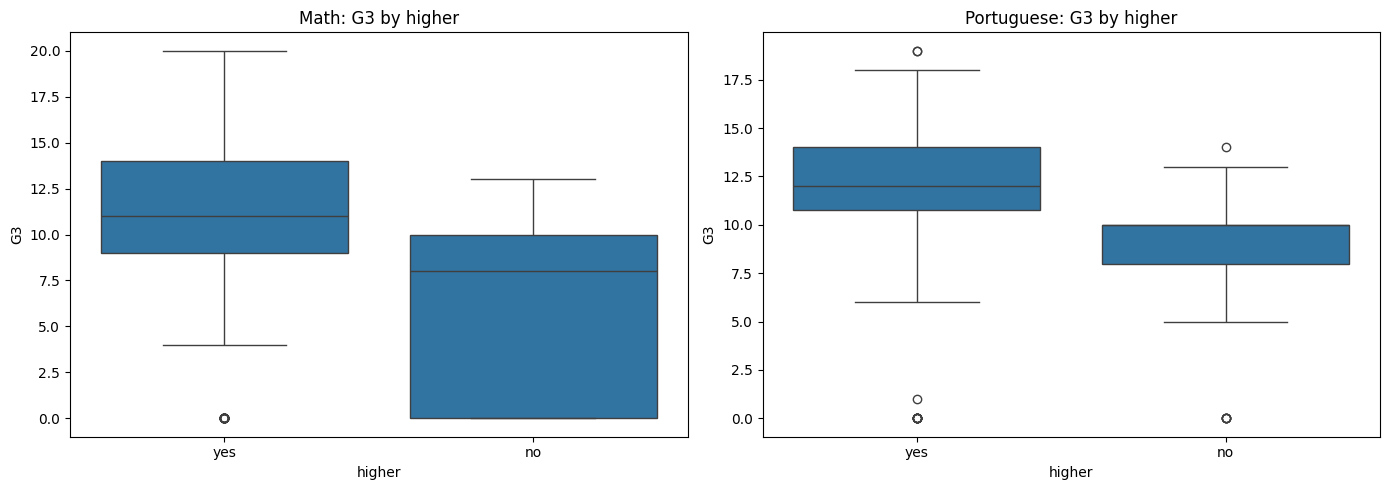

In [ ]:
analyze_feature('higher', math_df, por_df)

Those who want higher education are clearly doing bette.

Decision

 keep it.

## 3.22 Internet Attribute


📌 Feature: INTERNET

-- Value Counts --
Math:
internet
yes    329
no      66
Name: count, dtype: int64
Portuguese:
internet
yes    498
no     151
Name: count, dtype: int64

-- G3 Mean --
Math:
internet
no      9.409091
yes    10.617021
Name: G3, dtype: float64
Portuguese:
internet
no     11.026490
yes    12.172691
Name: G3, dtype: float64

-- G3 Std --
Math:
internet
no     4.485797
yes    4.580494
Name: G3, dtype: float64
Portuguese:
internet
no     3.446635
yes    3.117146
Name: G3, dtype: float64


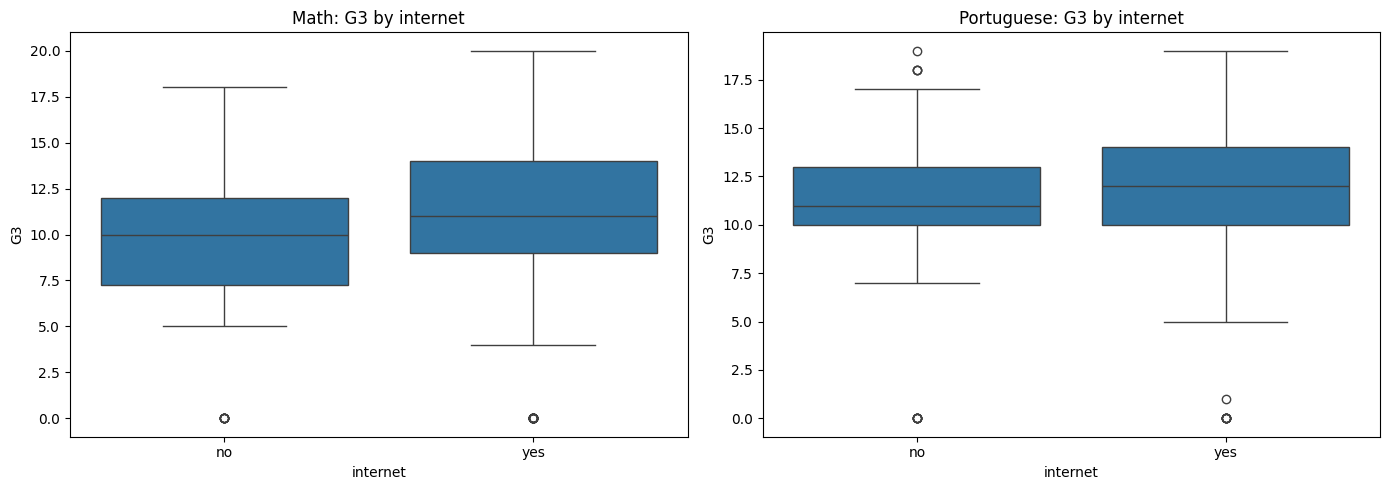

In [ ]:
analyze_feature('internet', math_df, por_df)

### Analysis

he internet acess has a positive influence in the final grade of a student.

### Decision

Keep internet feature

## 3.23 Romantic Attribute


📌 Feature: ROMANTIC

-- Value Counts --
Math:
romantic
no     263
yes    132
Name: count, dtype: int64
Portuguese:
romantic
no     410
yes    239
Name: count, dtype: int64

-- G3 Mean --
Math:
romantic
no     10.836502
yes     9.575758
Name: G3, dtype: float64
Portuguese:
romantic
no     12.129268
yes    11.523013
Name: G3, dtype: float64

-- G3 Std --
Math:
romantic
no     4.385946
yes    4.856916
Name: G3, dtype: float64
Portuguese:
romantic
no     3.003726
yes    3.560771
Name: G3, dtype: float64


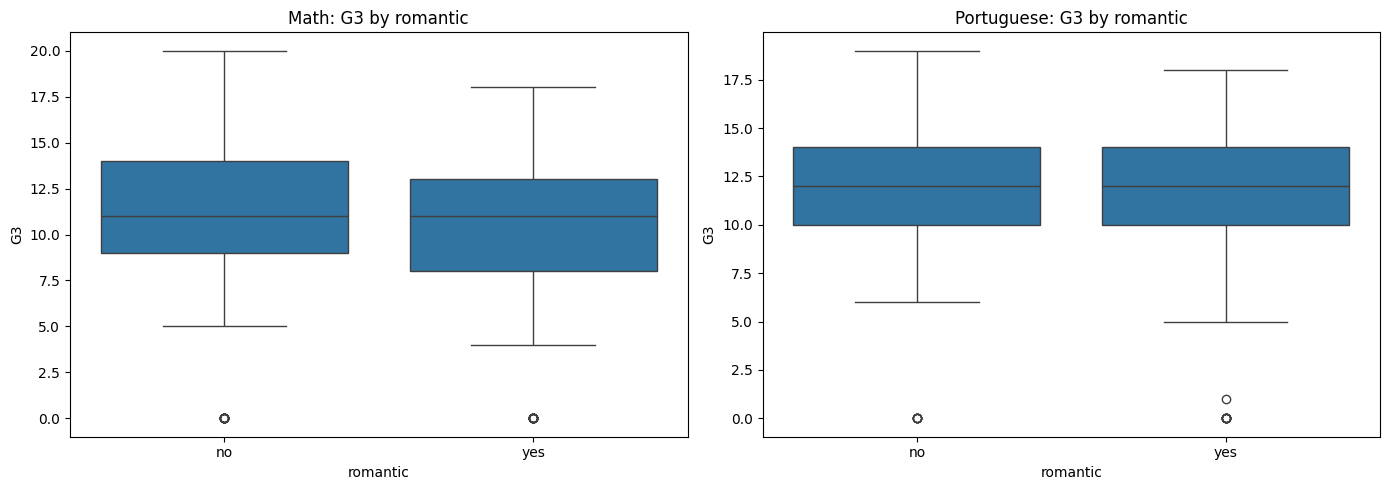

In [ ]:
analyze_feature('romantic', math_df, por_df)

### Anlysis

it seems like it makes no difference if the person is either in a relation or not.

### Decision

remove this feature

## 3.24 Famrel Attribute  


📌 Feature: FAMREL

-- Value Counts --
Math:
famrel
4    195
5    106
3     68
2     18
1      8
Name: count, dtype: int64
Portuguese:
famrel
4    317
5    180
3    101
2     29
1     22
Name: count, dtype: int64

-- G3 Mean --
Math:
famrel
1    10.625000
2     9.888889
3    10.044118
4    10.358974
5    10.830189
Name: G3, dtype: float64
Portuguese:
famrel
1    10.636364
2    10.862069
3    11.594059
4    12.343849
5    11.633333
Name: G3, dtype: float64

-- G3 Std --
Math:
famrel
1    4.838462
2    5.550717
3    4.647046
4    4.395916
5    4.733813
Name: G3, dtype: float64
Portuguese:
famrel
1    3.645551
2    3.710257
3    3.033738
4    2.937923
5    3.584417
Name: G3, dtype: float64


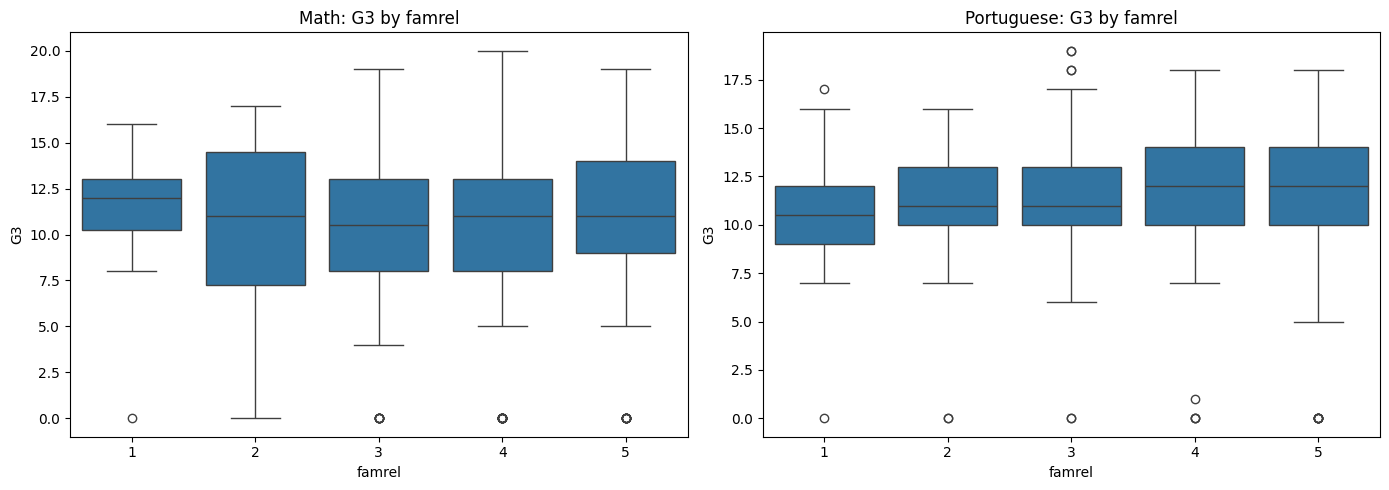

In [ ]:
analyze_feature('famrel', math_df, por_df)

### Analysis

It seems that there's no huge between a bad and an excellent family relation.

### Decision

Remove famrel feature

## 3.25 Freetime Attribute  


📌 Feature: FREETIME

-- Value Counts --
Math:
freetime
3    157
4    115
2     64
5     40
1     19
Name: count, dtype: int64
Portuguese:
freetime
3    251
4    178
2    107
5     68
1     45
Name: count, dtype: int64

-- G3 Mean --
Math:
freetime
1     9.842105
2    11.562500
3     9.783439
4    10.426087
5    11.300000
Name: G3, dtype: float64
Portuguese:
freetime
1    11.733333
2    12.710280
3    12.059761
4    11.713483
5    10.691176
Name: G3, dtype: float64

-- G3 Std --
Math:
freetime
1    4.752346
2    4.219663
3    4.794920
4    4.330757
5    4.619912
Name: G3, dtype: float64
Portuguese:
freetime
1    2.499091
2    3.458676
3    3.041121
4    3.064640
5    3.982264
Name: G3, dtype: float64


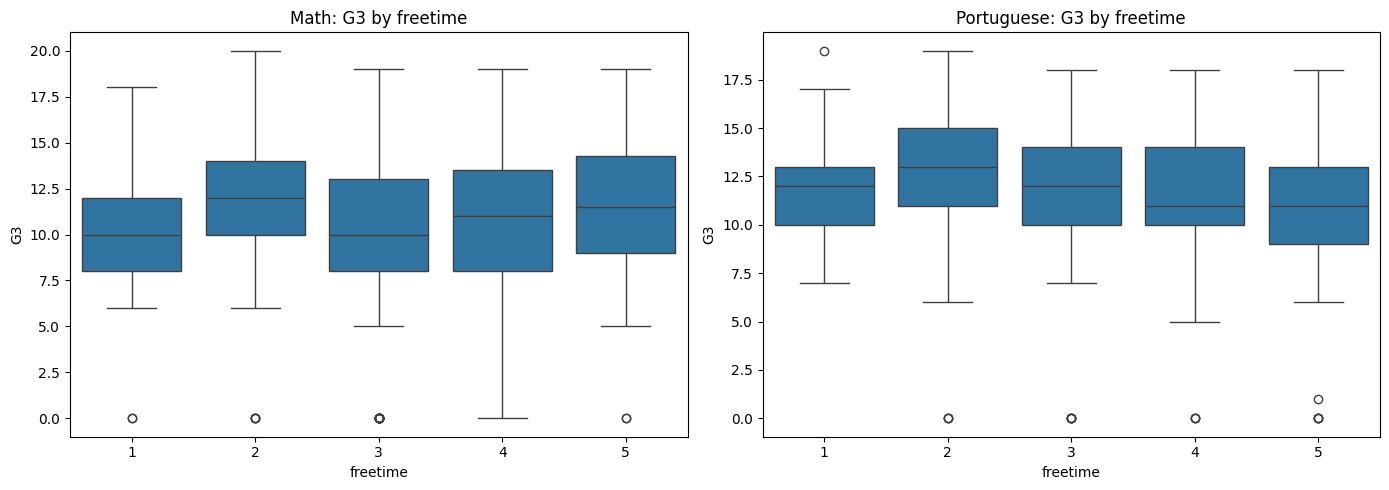

In [ ]:
analyze_feature('freetime', math_df, por_df)

### Analysis

This fetaure seem to have more diverse data

### Decision

keep it


## 3.26 Goout Attribute


📌 Feature: GOOUT

-- Value Counts --
Math:
goout
3    130
2    103
4     86
5     53
1     23
Name: count, dtype: int64
Portuguese:
goout
3    205
2    145
4    141
5    110
1     48
Name: count, dtype: int64

-- G3 Mean --
Math:
goout
1     9.869565
2    11.194175
3    10.961538
4     9.651163
5     9.037736
Name: G3, dtype: float64
Portuguese:
goout
1    10.729167
2    12.668966
3    12.151220
4    11.971631
5    10.872727
Name: G3, dtype: float64

-- G3 Std --
Math:
goout
1    5.336873
2    4.535391
3    4.210367
4    4.421252
5    5.072408
Name: G3, dtype: float64
Portuguese:
goout
1    3.846743
2    3.171170
3    2.902258
4    2.818164
5    3.719794
Name: G3, dtype: float64


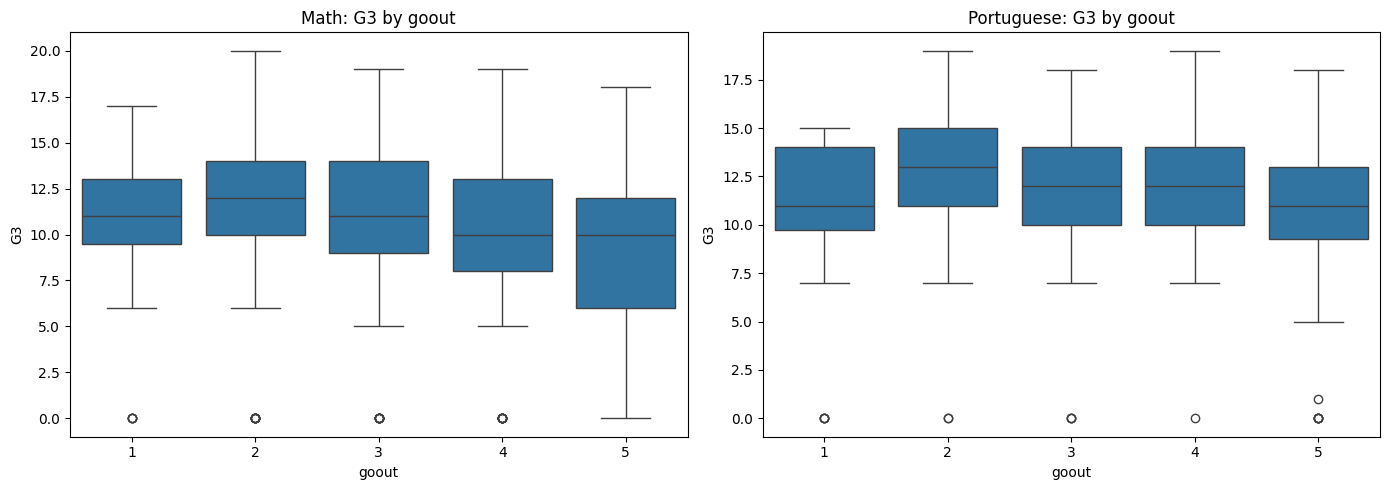

In [ ]:
analyze_feature('goout', math_df, por_df)

### Analysis

It seems that there's a trade-off between the time spent out. Higher minutes out mean a worse grade, but less minutes also means a worse grade. An average time has a higher grade, maybe this is related to a boost by spending just enough time going out and enjoying it. Keep goout feature
encode it as follows:
math_df['goout'] = math_df['goout'].map({1:1, 2:2, 3:1, 4:0, 5:0})
por_df['goout'] = por_df['goout'].map({1:0, 2:2, 3:1, 4:1, 5:0})

### Decision

keep it

## 3.27 Dalc Attribute  



📌 Feature: DALC

-- Value Counts --
Math:
Dalc
1    276
2     75
3     26
5      9
4      9
Name: count, dtype: int64
Portuguese:
Dalc
1    451
2    121
3     43
5     17
4     17
Name: count, dtype: int64

-- G3 Mean --
Math:
Dalc
1    10.731884
2     9.253333
3    10.500000
4     9.888889
5    10.666667
Name: G3, dtype: float64
Portuguese:
Dalc
1    12.299335
2    11.363636
3    11.139535
4     8.941176
5    10.235294
Name: G3, dtype: float64

-- G3 Std --
Math:
Dalc
1    4.676502
2    4.812970
3    3.443835
4    2.619372
5    2.692582
Name: G3, dtype: float64
Portuguese:
Dalc
1    3.102898
2    3.329164
3    2.252844
4    5.129213
5    2.948080
Name: G3, dtype: float64


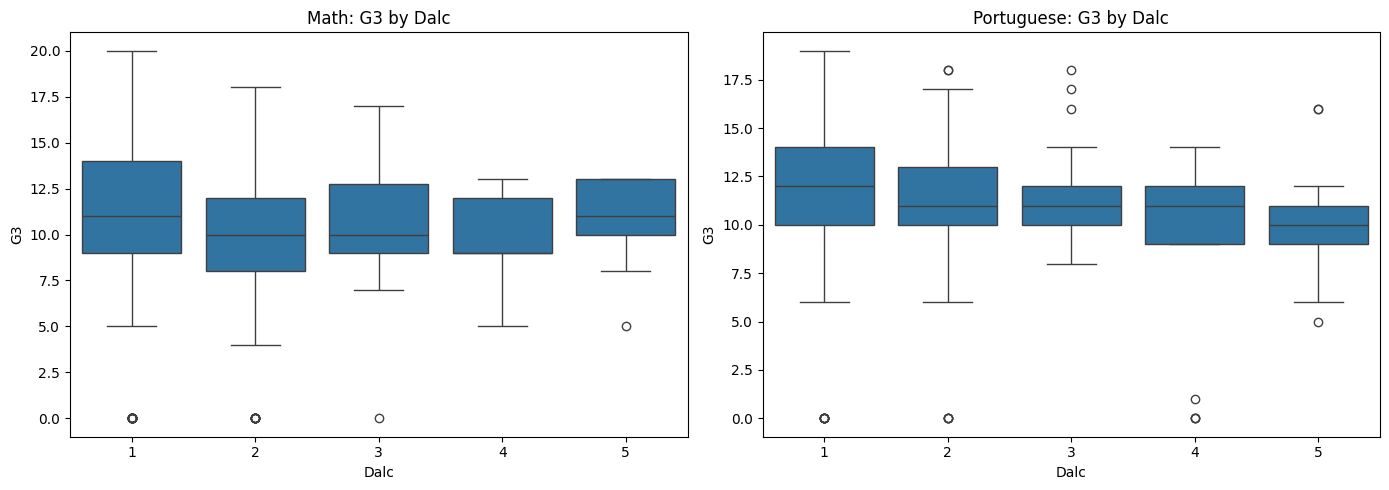

In [ ]:
analyze_feature('Dalc', math_df, por_df)

### Analysis

In portuguese, it's clear that the performance decreases, while in math is more confuse.

### Decision

Keep feature, but edit the portguese one

## 3.28 Walc Attribute  


📌 Feature: WALC

-- Value Counts --
Math:
Walc
1    151
2     85
3     80
4     51
5     28
Name: count, dtype: int64
Portuguese:
Walc
1    247
2    150
3    120
4     87
5     45
Name: count, dtype: int64

-- G3 Mean --
Math:
Walc
1    10.735099
2    10.082353
3    10.725000
4     9.686275
5    10.142857
Name: G3, dtype: float64
Portuguese:
Walc
1    12.360324
2    12.260000
3    11.666667
4    11.034483
5    10.555556
Name: G3, dtype: float64

-- G3 Std --
Math:
Walc
1    5.133812
2    4.950257
3    3.700753
4    3.619338
5    4.125030
Name: G3, dtype: float64
Portuguese:
Walc
1    3.057000
2    3.085863
3    3.642267
4    2.805511
5    3.583774
Name: G3, dtype: float64


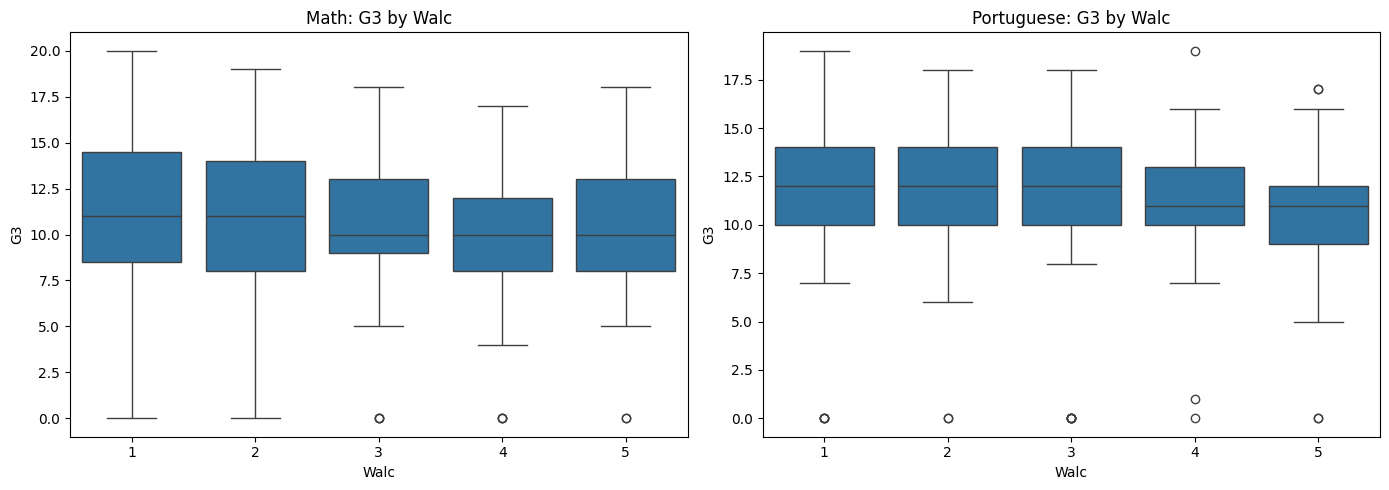

In [ ]:
analyze_feature('Walc', math_df, por_df)

### Analysis

This feature is more precise, the mean grade decreases after a certain amount of alcohol consumption during the weekend.

### Decision

Keep Walc feature, but edit (1-2,3-5) for Math and (1-3, 4-5) for Portuguese.

## 3.29 Health Attribute


📌 Feature: HEALTH

-- Value Counts --
Math:
health
5    146
3     91
4     66
1     47
2     45
Name: count, dtype: int64
Portuguese:
health
5    249
3    124
4    108
1     90
2     78
Name: count, dtype: int64

-- G3 Mean --
Math:
health
1    11.872340
2    10.222222
3    10.010989
4    10.106061
5    10.397260
Name: G3, dtype: float64
Portuguese:
health
1    12.477778
2    12.192308
3    11.838710
4    12.305556
5    11.469880
Name: G3, dtype: float64

-- G3 Std --
Math:
health
1    4.351996
2    5.497474
3    4.183286
4    4.871041
5    4.417020
Name: G3, dtype: float64
Portuguese:
health
1    3.264476
2    3.299184
3    3.137466
4    2.996753
5    3.302018
Name: G3, dtype: float64


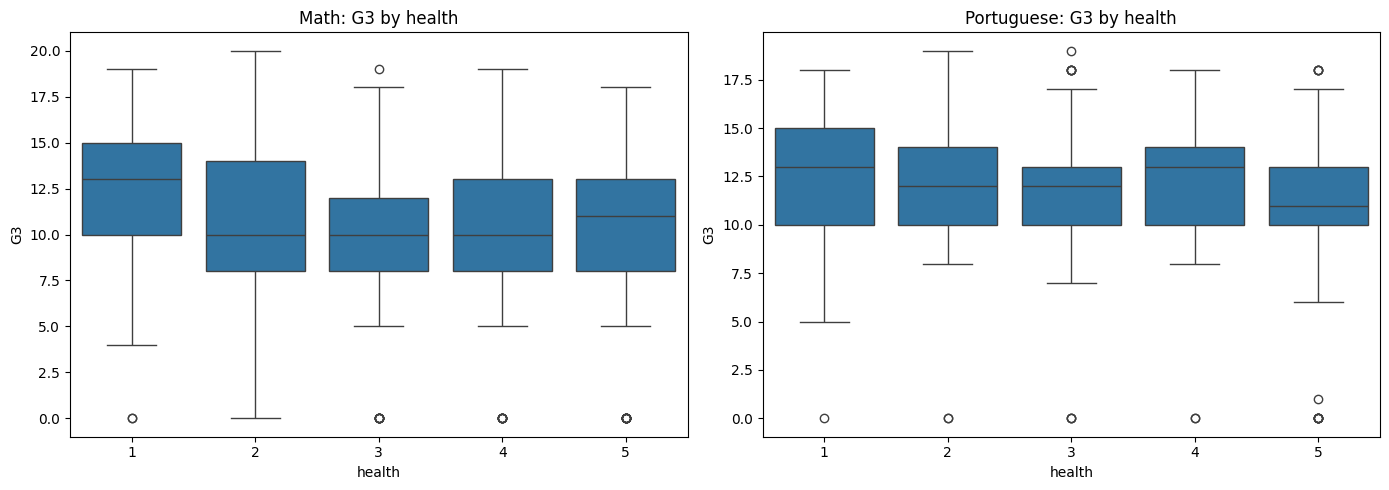

In [ ]:
analyze_feature('health', math_df, por_df)

### Analysis

Strangely, students with very bad health status have a higher grade.

### Decision

we will keep this feature and group the values together as the range 2-4 for Math and 2-3 for Portuguese have very close values.

## 3.30 Absences Attribute  


### Analysis

As the values of this feature vary from 0-93 we will edit it to **absencesband** feature by grouping it into a few bands.

In [ ]:
math_df['absencesband'] = pd.cut(math_df['absences'],10, duplicates='drop')

In [ ]:
math_df['absencesband'].unique()

[(-0.075, 7.5], (7.5, 15.0], (15.0, 22.5], (22.5, 30.0], (52.5, 60.0], (67.5, 75.0], (37.5, 45.0]]
Categories (10, interval[float64, right]): [(-0.075, 7.5] < (7.5, 15.0] < (15.0, 22.5] <
                                            (22.5, 30.0] ... (45.0, 52.5] < (52.5, 60.0] <
                                            (60.0, 67.5] < (67.5, 75.0]]

In [ ]:
math_df[['absencesband','G3']].groupby(math_df['absencesband'],as_index=False).count()

,absencesband,G3
0,287,287
1,75,75
2,22,22
3,6,6
4,0,0
5,2,2
6,0,0
7,2,2
8,0,0
9,1,1


In [ ]:
math_df.loc[math_df['absences'] <= 15, 'absences' ] = 0
math_df.loc[(math_df['absences'] > 15) & (math_df['absences'] <= 23), 'absences' ] = 1
math_df.loc[math_df['absences'] > 23, 'absences' ] = 2

## Where 0 is equivalent to less than 15 absences
## 1 is equivalent to less than 23 absences and more than 15
## 3 is equivalent to more than 23

In [ ]:
math_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absencesband
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,0,5,6,6,"(-0.075, 7.5]"
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,0,5,5,6,"(-0.075, 7.5]"
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,0,7,8,10,"(7.5, 15.0]"
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,15,14,15,"(-0.075, 7.5]"
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,6,10,10,"(-0.075, 7.5]"


In [ ]:
math_df[['absences','G3']].groupby(math_df['absences'],as_index=False).count()

,absences,G3
0,362,362
1,23,23
2,10,10


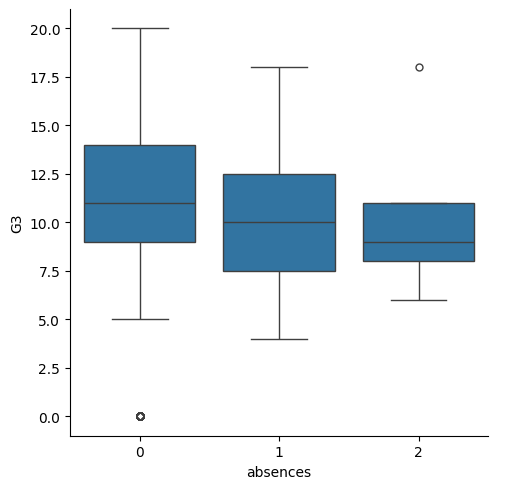

In [ ]:
sns.catplot(x="absences",y="G3", kind="box",data=math_df)

Now we can see that the grade decreases as the absences are more

In [ ]:
por_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
por_df['absencesband'] = pd.cut(por_df['absences'],8, duplicates='drop')

In [ ]:
por_df['absencesband'].unique()

[(-0.032, 4.0], (4.0, 8.0], (8.0, 12.0], (12.0, 16.0], (20.0, 24.0], (28.0, 32.0], (16.0, 20.0], (24.0, 28.0]]
Categories (8, interval[float64, right]): [(-0.032, 4.0] < (4.0, 8.0] < (8.0, 12.0] < (12.0, 16.0] <
                                           (16.0, 20.0] < (20.0, 24.0] < (24.0, 28.0] <
                                           (28.0, 32.0]]

In [ ]:
por_df[['absencesband','G3']].groupby(por_df['absencesband'],as_index=False).count()

,absencesband,G3
0,466,466
1,106,106
2,45,45
3,21,21
4,3,3
5,5,5
6,1,1
7,2,2


In [ ]:
por_df.loc[por_df['absences'] <= 4, 'absences' ] = 0
por_df.loc[(por_df['absences'] > 4) & (por_df['absences'] <= 8), 'absences' ] = 1
por_df.loc[(por_df['absences'] > 8) & (por_df['absences'] <= 12), 'absences' ] = 2
por_df.loc[por_df['absences'] > 12, 'absences' ] = 3

In [ ]:
por_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absencesband
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,0,0,11,11,"(-0.032, 4.0]"
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,0,9,11,11,"(-0.032, 4.0]"
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,1,12,13,12,"(4.0, 8.0]"
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,"(-0.032, 4.0]"
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,"(-0.032, 4.0]"


In [ ]:
por_df[['absences','G3']].groupby(por_df['absences'],as_index=False).count()

,absences,G3
0,466,466
1,106,106
2,45,45
3,32,32


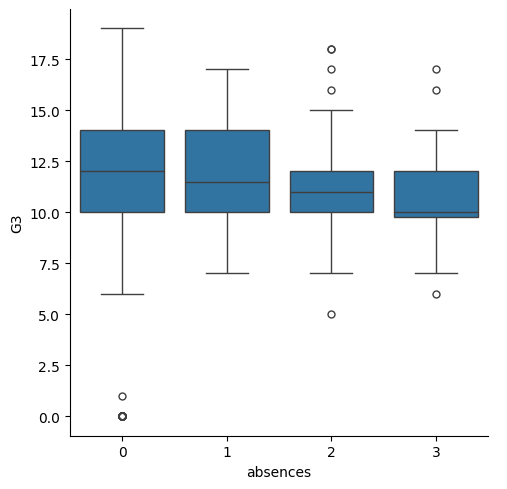

In [ ]:
sns.catplot(x="absences",y="G3", kind="box",data=por_df)

same for this subject as the absences are more we can clearly see the the grade is increasing

### Decision

we will keep this attribute

## Now we are going to delete and edit the corresponding features

Remove in Math: school, famsize, Pstatus, famsup, paid, activities, nursery, romantic, famrel, absencesband

Remove in Portuguese: famsize, Pstatus, famsup, paid, activities, nursery, romantic, famrel, absencesband

In [ ]:
def drop_features(df, feature_list):
    for feature in feature_list:
        if feature in df.columns:
            df = df.drop(columns=[feature])
            print(f" '{feature}' dropped.")
        else:
            print(f" '{feature}' not found in DataFrame.")
    return df

In [ ]:
list_math = ['school','famsize', 'Pstatus', 'famsup', 'paid', 'activities', 'nursery', 'romantic', 'famrel', 'absencesband']
list_port = ['famsize', 'Pstatus', 'famsup', 'paid', 'activities', 'romantic', 'famrel', 'absencesband']

In [ ]:
math_df=drop_features(math_df,list_math)

 'school' dropped.
 'famsize' dropped.
 'Pstatus' dropped.
 'famsup' dropped.
 'paid' dropped.
 'activities' dropped.
 'nursery' dropped.
 'romantic' dropped.
 'famrel' dropped.
 'absencesband' dropped.


In [ ]:
list(math_df.columns)

['sex',
 'age',
 'address',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'higher',
 'internet',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [ ]:
por_df=drop_features(por_df,list_port)


 'famsize' dropped.
 'Pstatus' dropped.
 'famsup' dropped.
 'paid' dropped.
 'activities' dropped.
 'romantic' dropped.
 'famrel' dropped.
 'absencesband' dropped.


In [ ]:
list(por_df.columns)

['school',
 'sex',
 'age',
 'address',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'nursery',
 'higher',
 'internet',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [ ]:
independent_attributes = [
    "school",
    "sex",
    "age",
    "address",
    "famsize",
    "Pstatus",
    "Medu",
    "Fedu",
    "Mjob",
    "Fjob",
    "reason",
    "nursery",
    "internet",
    "romantic",
    "health",
    "guardian",
    "traveltime",
    "studytime",
    "famsup",
    "activities",
    "higher",
    "freetime",
    "goout",
    "Dalc",
    "Walc",
    "famrel",
]


common_columns = [
    col
    for col in independent_attributes
    if col in math_df.columns and col in por_df.columns
]

print(common_columns)
common_students = pd.merge(
    math_df, por_df, on=common_columns,
)

print("Number of common students:", common_students)
print("Number of common students:", common_students.shape[0])
print("Number of columns in common students:", common_students.shape[1])

['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'internet', 'health', 'guardian', 'traveltime', 'studytime', 'higher', 'freetime', 'goout', 'Dalc', 'Walc']
Number of common students:     sex  age address  Medu  Fedu      Mjob      Fjob  reason guardian  \
0     F   18       U     4     4   at_home   teacher  course   mother   
1     F   17       U     1     1   at_home     other  course   father   
2     F   15       U     1     1   at_home     other   other   mother   
3     F   15       U     4     2    health  services    home   mother   
4     F   16       U     3     3     other     other    home   father   
..   ..  ...     ...   ...   ...       ...       ...     ...      ...   
365   F   19       R     2     3  services     other  course   mother   
366   F   18       U     3     1   teacher  services  course   mother   
367   F   18       U     1     1     other     other  course   mother   
368   M   17       U     3     1  services  services  course   moth

Edit Math:

**Age**
- '15-16' → 0  
- '17' → 1  
- '18' → 2  
- '19' → 3  
- '20' → 4  
- '21' → 5  
- '22' → 6  

**Medu (Mother's education):**
- '1' or '3' → 1  
- '2' → 2  
- '4' → 3  

**Fedu (Father's education):**
- '1' or '3' → 1  
- '2' → 2  
- '4' → 3  

**Mjob (Mother's job):**
- 'at_home' → 0  
- 'health' → 1  
- 'other', 'services', 'teacher' → 2  

**Fjob (Father's job):**
- 'teacher' → 0  
- 'other', 'services', 'health', 'at_home' → 1  

**reason (reason for choosing school):**
- 'course' → 0  
- 'other', 'home', 'reputation' → 1  

**guardian:**
- 'mother', 'father' → 0  
- 'other' → 1  

**traveltime:**
- '1' → 0  
- '2', '3', '4' → 1  

**studytime:**
- '1' → 0  
- '2' → 1  
- '3', '4' → 2  

** Failures**
- '2', '3' → 2  

**freetime:**
- '1' → 0  
- '2' → 1  
- '3' → 2  
- '4', '5' → 3  

**goout:**
- '1' → 0  
- '2' → 1  
- '3' → 2  
- '4', '5' → 3  

**Dalc (Workday alcohol):**
- '1' → 0  
- '2', '3' → 1  
- '4' → 2  
- '5' → 3  

**Walc (Weekend alcohol):**
- '1', '2' → 0  
- '3', '4', '5' → 1  

** Health**
- '1' → 0  
- '2', '3', '4' → 1  
- '5' → 2  


Edit Portuguese:

**Age**
- '15-18' → 0  
- '19' → 1  
- '20' → 2  
- '21' → 3  
- '22' → 4  

**Medu (Mother's education):**
- '0-1' → 0  
- '2-3' → 1  
- '4' → 2  

**Fedu (Father's education):**
- '0-1' → 0  
- '2-3' → 1  
- '4' → 2  

**Mjob (Mother's job):**
- 'at_home' → 0  
- 'health' → 1  
- 'other', 'services' → 2  
- 'teacher' → 3  

**Fjob (Father's job):**
- 'teacher' → 0  
- 'other', 'services', 'health' → 1  
- 'at_home' → 2  

**reason (reason for choosing school):**
- 'course', 'other' → 0  
- 'home' → 1  
- 'reputation' → 2  

**guardian:**
- 'mother', 'father' → 0  
- 'other' → 1  

**traveltime:**
- '1' → 0  
- '2', '3', '4' → 1  

**studytime:**
- '1' → 0  
- '2' → 1  
- '3', '4' → 2  

**freetime:**
- '1' → 0  
- '2' → 1  
- '3' → 2  
- '4', '5' → 3  

**goout:**
- '1' → 0  
- '2' → 1  
- '3', '4' → 2  
- '5' → 3  

**Dalc (Workday alcohol):**
- '1' → 0  
- '2', '3', '4' → 1  
- '5' → 2  

**Walc (Weekend alcohol):**
- '1', '2', '3' → 0  
- '4', '5' → 1  

**Health**
- '1', '4' → 0  
- '2', '3' → 1  
- '5' → 2  


We'll now convert the categorical features into numerical features.
We'll also group some numerical categories, as several different numerical features does not have a impact in the grade.

In [ ]:
por_df['school'].unique()


array(['GP', 'MS'], dtype=object)

In [ ]:

por_df['school'] = por_df['school'].map({'GP':1, 'MS':0})



In [ ]:


math_df['sex'] = math_df['sex'].map({'M':0,'F':1})
por_df['sex'] = por_df['sex'].map({'M':0,'F':1})


In [ ]:
math_df['address'] = math_df['address'].map({'U':1,'R':0})
por_df['address'] = por_df['address'].map({'U':1,'R':0})



In [ ]:
math_df['age'] = math_df['age'].map({15:4, 16:4, 17:3, 18:2, 19:1, 20:5, 21:0, 22:1})
por_df['age'] = por_df['age'].map({15:3, 16:3, 17:3, 18:3, 19:1, 20:3, 21:2, 22:0})

In [ ]:
math_df['Medu'] = math_df['Medu'].map({0:3, 1:0, 2:1, 3:0, 4:1})
por_df['Medu'] = por_df['Medu'].map({0:0, 1:0, 2:1, 3:1, 4:2})

In [ ]:
math_df['Fedu'] = math_df['Fedu'].map({0:2, 1:0, 2:1, 3:0, 4:1})
por_df['Fedu'] = por_df['Fedu'].map({0:0, 1:0, 2:1, 3:1, 4:2})

In [ ]:
math_df['Mjob'] = math_df['Mjob'].map({'at_home':0, 'health':2, 'other':1, 'services':1, 'teacher':1})
por_df['Mjob'] = por_df['Mjob'].map({'at_home':0, 'health':2, 'other':1, 'services':1, 'teacher':2})

In [ ]:
math_df['Fjob'] = math_df['Fjob'].map({'at_home':0, 'health':0, 'other':0, 'services':0, 'teacher':1})
por_df['Fjob'] = por_df['Fjob'].map({'at_home':0, 'health':1, 'other':1, 'services':1, 'teacher':2})

In [ ]:
math_df['reason'] = math_df['reason'].map({'course':0, 'home':1, 'other':1, 'reputation':1})
por_df['reason'] = por_df['reason'].map({'course':0, 'home':1, 'other':0, 'reputation':2})

In [ ]:
math_df['guardian'] = math_df['guardian'].map({'mother':1, 'father':1, 'other':0})
por_df['guardian'] = por_df['guardian'].map({'mother':1, 'father':1, 'other':0})

In [ ]:
math_df['traveltime'] = math_df['traveltime'].map({1:0, 2:1, 3:1, 4:1})
por_df['traveltime'] = por_df['traveltime'].map({1:0, 2:1, 3:1, 4:1})

In [ ]:
math_df['studytime'] = math_df['studytime'].map({1:0, 2:1, 3:2, 4:2})
por_df['studytime'] = por_df['studytime'].map({1:0, 2:1, 3:2, 4:2})

In [ ]:
math_df['failures'] = math_df['failures'].map({0:0, 1:1, 2:2, 3:2})

In [ ]:
math_df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    int64 
 1   age         395 non-null    int64 
 2   address     395 non-null    int64 
 3   Medu        395 non-null    int64 
 4   Fedu        395 non-null    int64 
 5   Mjob        395 non-null    int64 
 6   Fjob        395 non-null    int64 
 7   reason      395 non-null    int64 
 8   guardian    395 non-null    int64 
 9   traveltime  395 non-null    int64 
 10  studytime   395 non-null    int64 
 11  failures    395 non-null    int64 
 12  schoolsup   395 non-null    object
 13  higher      395 non-null    object
 14  internet    395 non-null    object
 15  freetime    395 non-null    int64 
 16  goout       395 non-null    int64 
 17  Dalc        395 non-null    int64 
 18  Walc        395 non-null    int64 
 19  health      395 non-null    int64 
 20  absences  

In [ ]:
math_df['schoolsup'] = math_df['schoolsup'].map({'no':1, 'yes':0})
por_df['schoolsup'] = por_df['schoolsup'].map({'no':1, 'yes':0})



In [ ]:
por_df['nursery'] = por_df['nursery'].map({'no':0, 'yes':1})

In [ ]:
math_df['higher'] = math_df['higher'].map({'no':0, 'yes':1})
por_df['higher'] = por_df['higher'].map({'no':0, 'yes':1})

In [ ]:
math_df['internet'] = math_df['internet'].map({'no':0, 'yes':1})
por_df['internet'] = por_df['internet'].map({'no':0, 'yes':1})

In [ ]:
math_df['freetime'] = math_df['freetime'].map({1:0, 2:2, 3:0, 4:1, 5:1})
por_df['freetime'] = por_df['freetime'].map({1:1, 2:2, 3:1, 4:0, 5:0})

In [ ]:
math_df['goout'] = math_df['goout'].map({1:1, 2:2, 3:1, 4:0, 5:0})
por_df['goout'] = por_df['goout'].map({1:0, 2:2, 3:1, 4:1, 5:0})

In [ ]:
math_df['Dalc'] = math_df['Dalc'].map({1:1, 2:0, 3:0, 4:1, 5:1})
por_df['Dalc'] = por_df['Dalc'].map({1:1, 2:1, 3:1, 4:1, 5:0})

In [ ]:
math_df['health'] = math_df['health'].map({1:2, 2:0, 3:0, 4:0, 5:1})
por_df['health'] = por_df['health'].map({1:3, 2:1, 3:1, 4:2, 5:0})

In [ ]:
#math_df['G3'] = math_df['G3'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0,
                                   #10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1, 19:1, 20:1})
#por_df['G3'] = por_df['G3'].map({0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0,
                                   #10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1, 17:1, 18:1, 19:1, 20:1})

In [ ]:
math_df.head()


,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,2,1,1,1,0,1,0,1,1,...,0,0,0,1,1,0,0,5,6,6
1,1,3,1,0,0,0,0,0,1,0,...,1,0,1,1,1,0,0,5,5,6
2,1,4,1,0,0,0,0,1,1,0,...,1,0,2,0,3,0,0,7,8,10
3,1,4,1,1,1,2,0,1,1,0,...,1,2,2,1,1,1,0,15,14,15
4,1,4,1,0,0,1,0,1,1,0,...,0,0,2,1,2,1,0,6,10,10


In [ ]:
por_df.head()

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,...,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,3,1,2,2,0,2,0,1,...,0,1,1,1,1,1,0,0,11,11
1,1,1,3,1,0,0,0,1,0,1,...,1,1,1,1,1,1,0,9,11,11
2,1,1,3,1,0,0,0,1,0,1,...,1,1,2,1,3,1,1,12,13,12
3,1,1,3,1,2,1,2,1,1,1,...,1,2,2,1,1,0,0,14,14,14
4,1,1,3,1,1,1,1,1,1,1,...,0,1,2,1,2,0,0,11,13,13


In [ ]:
list(math_df.columns)


['sex',
 'age',
 'address',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'higher',
 'internet',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [ ]:
list(por_df.columns)


['school',
 'sex',
 'age',
 'address',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'nursery',
 'higher',
 'internet',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [ ]:
features_math = ['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
        'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'higher', 'internet', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2']
features_port = ['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'nursery', 'higher', 'internet', 'freetime', 'goout',
       'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

targets = ['G3']

In [ ]:
math_df[features_math].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         395 non-null    int64
 1   age         395 non-null    int64
 2   address     395 non-null    int64
 3   Medu        395 non-null    int64
 4   Fedu        395 non-null    int64
 5   Mjob        395 non-null    int64
 6   Fjob        395 non-null    int64
 7   reason      395 non-null    int64
 8   guardian    395 non-null    int64
 9   traveltime  395 non-null    int64
 10  studytime   395 non-null    int64
 11  failures    395 non-null    int64
 12  schoolsup   395 non-null    int64
 13  higher      395 non-null    int64
 14  internet    395 non-null    int64
 15  freetime    395 non-null    int64
 16  goout       395 non-null    int64
 17  Dalc        395 non-null    int64
 18  Walc        395 non-null    int64
 19  health      395 non-null    int64
 20  absences    395 non-null    int6

In [ ]:
por_df[features_port].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int64
 1   sex         649 non-null    int64
 2   age         649 non-null    int64
 3   address     649 non-null    int64
 4   Medu        649 non-null    int64
 5   Fedu        649 non-null    int64
 6   Mjob        649 non-null    int64
 7   Fjob        649 non-null    int64
 8   reason      649 non-null    int64
 9   guardian    649 non-null    int64
 10  traveltime  649 non-null    int64
 11  studytime   649 non-null    int64
 12  failures    649 non-null    int64
 13  schoolsup   649 non-null    int64
 14  nursery     649 non-null    int64
 15  higher      649 non-null    int64
 16  internet    649 non-null    int64
 17  freetime    649 non-null    int64
 18  goout       649 non-null    int64
 19  Dalc        649 non-null    int64
 20  Walc        649 non-null    int6

#5.Modeling

In [ ]:
math_df.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,2,1,1,1,0,1,0,1,1,...,0,0,0,1,1,0,0,5,6,6
1,1,3,1,0,0,0,0,0,1,0,...,1,0,1,1,1,0,0,5,5,6
2,1,4,1,0,0,0,0,1,1,0,...,1,0,2,0,3,0,0,7,8,10
3,1,4,1,1,1,2,0,1,1,0,...,1,2,2,1,1,1,0,15,14,15
4,1,4,1,0,0,1,0,1,1,0,...,0,0,2,1,2,1,0,6,10,10


In [ ]:
por_df.head()

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,...,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,3,1,2,2,0,2,0,1,...,0,1,1,1,1,1,0,0,11,11
1,1,1,3,1,0,0,0,1,0,1,...,1,1,1,1,1,1,0,9,11,11
2,1,1,3,1,0,0,0,1,0,1,...,1,1,2,1,3,1,1,12,13,12
3,1,1,3,1,2,1,2,1,1,1,...,1,2,2,1,1,0,0,14,14,14
4,1,1,3,1,1,1,1,1,1,1,...,0,1,2,1,2,0,0,11,13,13


## 5.1 Spliting To Test And Train

In [ ]:
from sklearn.model_selection import train_test_split

# For Math dataset
X_math = math_df.drop(columns=['G3'])  # Features
y_math = math_df['G3']                # Target

X_math_train, X_math_test, y_math_train, y_math_test = train_test_split(
    X_math, y_math, test_size=0.2, random_state=42
)

# For Portuguese dataset
X_por = por_df.drop(columns=['G3'])   # Features
y_por = por_df['G3']                 # Target

X_por_train, X_por_test, y_por_train, y_por_test = train_test_split(
    X_por, y_por, test_size=0.2, random_state=42
)


In [ ]:
# Math dataset
print("Math Dataset:")
print("Training samples:", len(X_math_train))
print("Testing samples:", len(X_math_test))

# Portuguese dataset
print("\nPortuguese Dataset:")
print("Training samples:", len(X_por_train))
print("Testing samples:", len(X_por_test))


Math Dataset:
Training samples: 316
Testing samples: 79

Portuguese Dataset:
Training samples: 519
Testing samples: 130


# TRAINING THE MATH DATASET

We will evaluate the performance of our regression models using the following metrics:

**MAE (Mean Absolute Error):**
Measures the average magnitude of errors in the predictions, without considering their direction.

A lower MAE indicates better model accuracy.

**MSE (Mean Squared Error)**:

Calculates the average of the squared differences between the predicted and actual values.

MSE penalizes larger errors more heavily, making it sensitive to outliers.

**RMSE (Root Mean Squared Error)**:

The square root of the MSE, providing an error measure in the same units as the target variable.

A lower RMSE indicates better predictive accuracy.

**R² (R-squared)**:

Represents the proportion of variance in the target variable explained by the model.

A higher R² indicates that the model fits the data better.

These metrics will help us assess how well our models perform in predicting the target variable and guide us in model selection and improvement.

In [ ]:

# Scale the features
scaler = StandardScaler()
X_math_train_scaled = scaler.fit_transform(X_math_train)
X_math_test_scaled = scaler.transform(X_math_test)

## KNN Algorithm


### **Training**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

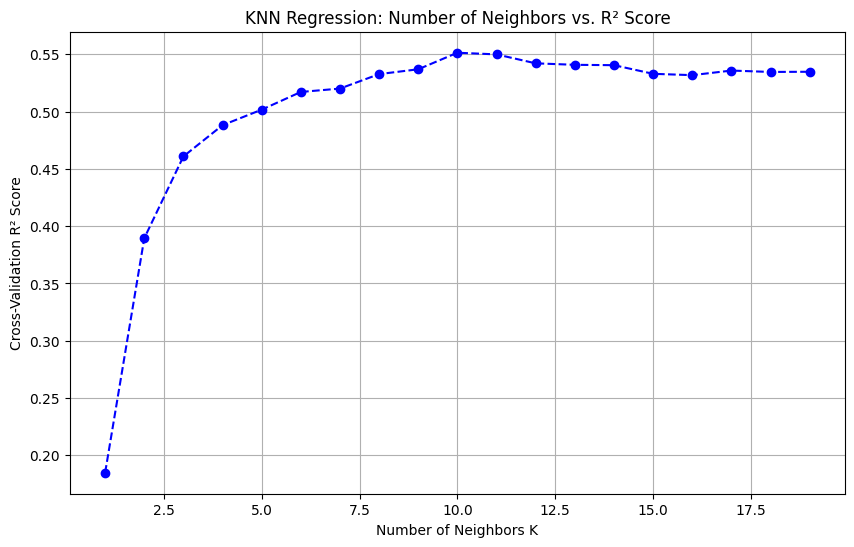

In [ ]:



# Range of neighbors to test
neighbors = range(1, 20)

# List to store cross-validation scores (e.g., R²)
cv_scores = []


# Perform 10-fold cross-validation for each number of neighbors
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k,weights='distance')
    scores = cross_val_score(knn, X_math_train_scaled, y_math_train, cv=10, scoring='r2')
    cv_scores.append(scores.mean())

# Plotting R² scores
plt.figure(figsize=(10, 6))
plt.plot(neighbors, cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation R² Score')
plt.title('KNN Regression: Number of Neighbors vs. R² Score')
plt.grid()
plt.show()


In [ ]:

# Train the final KNN model with best K (e.g., K=10)
knn = KNeighborsRegressor(n_neighbors=10,weights='distance')
knn.fit(X_math_train_scaled, y_math_train)

# Predict
y_pred_knn = knn.predict(X_math_test_scaled)


###**Evaluation**

In [ ]:
# Evaluate
mae_knn = mean_absolute_error(y_math_test, y_pred_knn)
mse_knn = mean_squared_error(y_math_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_math_test, y_pred_knn)

print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"R² Score: {r2_knn:.2f}")

Mean Absolute Error (MAE): 2.27
Mean Squared Error (MSE): 9.66
Root Mean Squared Error (RMSE): 3.11
R² Score: 0.53


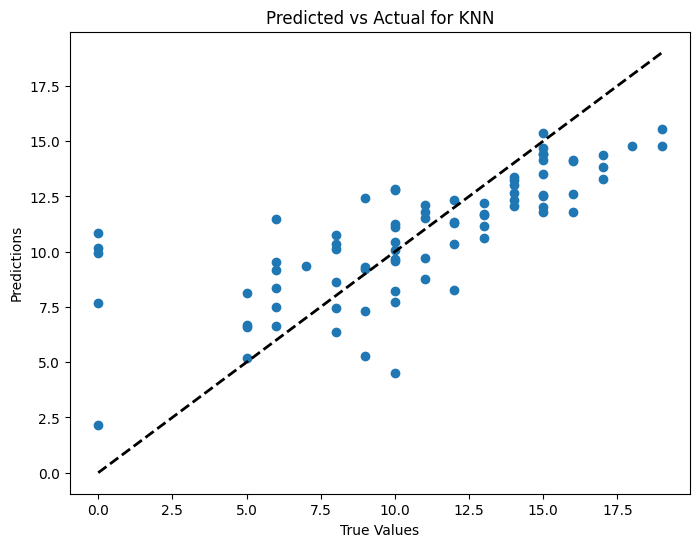

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_math_test, y_pred_knn)
plt.plot([y_math_test.min(), y_math_test.max()], [y_math_test.min(), y_math_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs Actual for KNN')
plt.show()


We plotted the predicted vs. actual values and observed the error distribution, which suggests that the model's predictions could be improved.

To improve the model, we will proceed with GridSearchCV to explore a wider range of hyperparameters, including the number of neighbors, distance metrics, and weight functions. This will help identify the best combination of hyperparameters to improve the model's accuracy and stability.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 21),  # Range of neighbors to test
    'weights': ['uniform', 'distance'],  # Weighting options for neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics to test
}

# Initialize the KNN regressor
knn = KNeighborsRegressor()

# Initialize GridSearchCV with cross-validation (cv=10 for 10-fold cross-validation)
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='r2', n_jobs=-1, verbose=1)

# Fit the model to the training data
grid_search.fit(X_math_train_scaled, y_math_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation R² Score:", grid_search.best_score_)

# Get the best model
best_knn = grid_search.best_estimator_

# Predict using the best model
y_pred_knn_best = best_knn.predict(X_math_test_scaled)

# Evaluate the best model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_best_knn = mean_absolute_error(y_math_test, y_pred_knn_best)
mse_best_knn = mean_squared_error(y_math_test, y_pred_knn_best)
rmse_best_knn = np.sqrt(mse_best_knn)
r2_best_knn = r2_score(y_math_test, y_pred_knn_best)

print(f"Best Model - Mean Absolute Error (MAE): {mae_best_knn:.2f}")
print(f"Best Model - Mean Squared Error (MSE): {mse_best_knn:.2f}")
print(f"Best Model - Root Mean Squared Error (RMSE): {rmse_best_knn:.2f}")
print(f"Best Model - R² Score: {r2_best_knn:.2f}")


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Best Cross-validation R² Score: 0.5513903414221264
Best Model - Mean Absolute Error (MAE): 2.27
Best Model - Mean Squared Error (MSE): 9.66
Best Model - Root Mean Squared Error (RMSE): 3.11
Best Model - R² Score: 0.53


After performing GridSearchCV on KNN, we found the best parameters (n_neighbors=10, weights='distance', metric='euclidean'), but the performance remains similar to the original model.

Since the performance hasn't significantly improved, this suggests the model's capacity is limited. To achieve better results, we can explore more complex models, such as Random Forest, which might offer improved performance through ensemble learning.

##Linear Regression Algorithm

###**Training**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_math_train_scaled, y_math_train)

# Making predictions
y_pred_lr = lr.predict(X_math_test_scaled)


###**Evaluation**

In [ ]:
# Evaluating the model
mae_lr = mean_absolute_error(y_math_test, y_pred_lr)
mse_lr = mean_squared_error(y_math_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_math_test, y_pred_lr)

# Printing the results
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")


Mean Absolute Error (MAE): 1.49
Mean Squared Error (MSE): 5.26
Root Mean Squared Error (RMSE): 2.29
R² Score: 0.74


###**Interpretation**

The linear regression model predicts the final student grade (G3) with an average absolute error of approximately **1.5 points**.  
An **R² score of 0.74** indicates that the model explains **74% of the variance** in student performance, showing a strong fit and reliable predictive power.

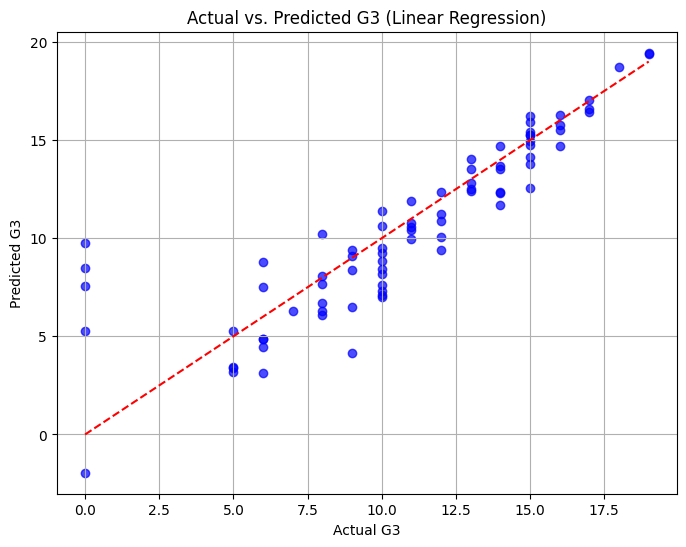

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_math_test, y_pred_lr, alpha=0.7, color='blue')
plt.plot([y_math_test.min(), y_math_test.max()], [y_math_test.min(), y_math_test.max()], '--r')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs. Predicted G3 (Linear Regression)")
plt.grid(True)
plt.show()


**Linear Regression with PCA**

To evaluate whether dimensionality reduction would improve our Linear Regression model, we applied PCA to the scaled feature set while retaining 95% of the variance. Then, we trained a new linear model on the transformed data.

Results:
- R² Score (Original Linear Regression): **0.74**
- R² Score (After PCA): **0.71**

Although PCA reduced the number of features, it slightly decreased the model's performance. This suggests that dimensionality reduction did not benefit the linear model in this case..


In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Apply PCA to keep 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_math_train_scaled)
X_test_pca = pca.transform(X_math_test_scaled)

# Step 2: Fit Linear Regression on PCA-transformed data
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_math_train)

# Step 3: Predict on the test set
y_pred_pca = lr_pca.predict(X_test_pca)

# Step 4: Evaluate performance
mae_pca = mean_absolute_error(y_math_test, y_pred_pca)
mse_pca = mean_squared_error(y_math_test, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
r2_pca = r2_score(y_math_test, y_pred_pca)

# Step 5: Print results
print("Linear Regression after PCA:")
print(f"MAE: {mae_pca:.2f}")
print(f"MSE: {mse_pca:.2f}")
print(f"RMSE: {rmse_pca:.2f}")
print(f"R² Score: {r2_pca:.2f}")


Linear Regression after PCA:
MAE: 1.74
MSE: 5.88
RMSE: 2.42
R² Score: 0.71


##Decision Tree Regression Algorithm

### **Training**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_math_train, y_math_train)
y_pred_dt = dt_regressor.predict(X_math_test)


###**Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_dt = mean_absolute_error(y_math_test, y_pred_dt)
mse_dt = mean_squared_error(y_math_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_math_test, y_pred_dt)

print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R²: {r2_dt:.2f}")


MAE: 2.11
MSE: 12.72
RMSE: 3.57
R²: 0.38


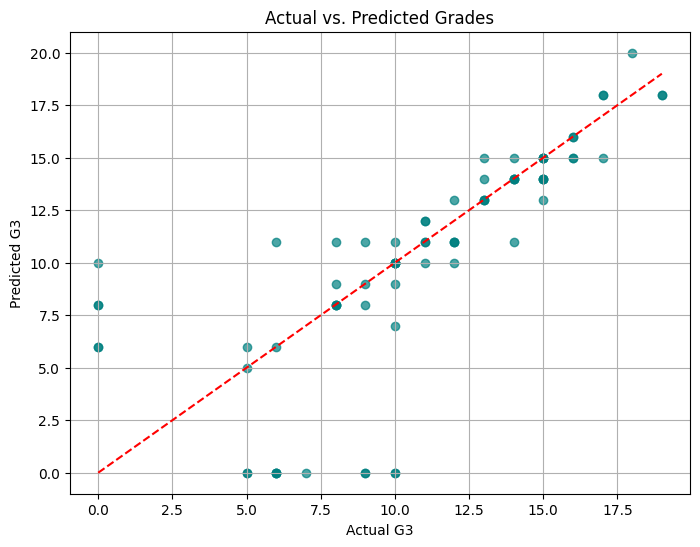

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_math_test, y_pred_dt, alpha=0.7, color='teal')
plt.plot([y_math_test.min(), y_math_test.max()], [y_math_test.min(), y_math_test.max()], 'r--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs. Predicted Grades")
plt.grid(True)
plt.show()


### **Interpretation**


 The decision tree model underperforms compared to linear regression in this case. It may be overfitting or failing to capture the underlying trend effectively.


Decision Tree Regression (Tuned)

After observing poor performance with the initial Decision Tree model (R² ≈ 0.38), we applied hyperparameter tuning using GridSearchCV. The following parameters were optimized:

- `max_depth`
- `min_samples_split`
- `min_samples_leaf`

The tuned model showed improved performance:

- **R² Score**:0.76 (updated from 0.38)


Despite improvements, the Decision Tree may still underperform compared to other models like Linear Regression (R² ≈ 0.74). This suggests that more flexible models such as **Random Forest** or **Gradient Boosting** may yield better results.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearch
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

# Fit on training data
grid_search_dt.fit(X_math_train, y_math_train)

# Best model
best_dt = grid_search_dt.best_estimator_

# Evaluate on test set
y_pred_best_dt = best_dt.predict(X_math_test)
mae_best = mean_absolute_error(y_math_test, y_pred_best_dt)
mse_best = mean_squared_error(y_math_test, y_pred_best_dt)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_math_test, y_pred_best_dt)

# Print
print("Tuned Decision Tree:")
print("Best Parameters:", grid_search_dt.best_params_)
print(f"MAE: {mae_best:.2f}")
print(f"MSE: {mse_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²: {r2_best:.2f}")


Tuned Decision Tree:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
MAE: 1.33
MSE: 4.96
RMSE: 2.23
R²: 0.76


##Rnadom Forest Algorithm

### **Trainig**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [ ]:

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_math_train, y_math_train)

# Predict
y_pred_rf = rf_model.predict(X_math_test)



### **Evaluation**

In [ ]:
# Evaluation metrics
mae_rf = mean_absolute_error(y_math_test, y_pred_rf)
mse_rf = mean_squared_error(y_math_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_math_test, y_pred_rf)

# Print results
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")


MAE: 1.47
MSE: 5.26
RMSE: 2.29
R²: 0.74


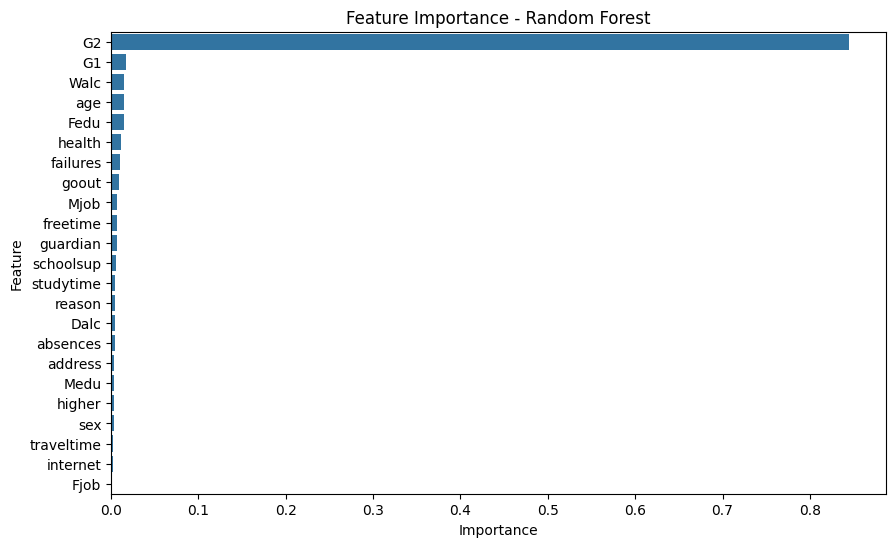

In [ ]:
# Import necessary library
import seaborn as sns

# Fit the Random Forest model again (if not already done)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_math_train_scaled, y_math_train)

# Get feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easier visualization
importances_df = pd.DataFrame({
    'Feature': X_math_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importance - Random Forest')
plt.show()


In [ ]:
# Use only G2 as feature
X_math_train_g2 = X_math_train[['G2']]
X_math_test_g2 = X_math_test[['G2']]

# Train a simple Linear Regression model using only G2
rm_g2 = RandomForestRegressor(n_estimators=100, random_state=42)
rm_g2.fit(X_math_train_g2, y_math_train)

# Predict
y_pred_g2 = rm_g2.predict(X_math_test_g2)

# Evaluate
mae_g2 = mean_absolute_error(y_math_test, y_pred_g2)
mse_g2 = mean_squared_error(y_math_test, y_pred_g2)
rmse_g2 = np.sqrt(mse_g2)
r2_g2 = r2_score(y_math_test, y_pred_g2)

# Print
print("Random Forest with G2 only:")
print(f"MAE: {mae_g2:.2f}")
print(f"MSE: {mse_g2:.2f}")
print(f"RMSE: {rmse_g2:.2f}")
print(f"R²: {r2_g2:.2f}")


Random Forest with G2 only:
MAE: 1.34
MSE: 4.82
RMSE: 2.20
R²: 0.76


### **Interpretation**


In our model, we noticed an improvement in performance when we focused only on the `G2` feature. By training the Random Forest model using `G2` as the sole predictor, the R² score increased from 0.74 to 0.76, which represents a notable improvement.

This suggests that the `G2` feature contains more relevant information for predicting the target variable `G3` compared to other features. It also highlights the importance of feature selection in improving model performance, as using more relevant features can lead to better predictions.


## SVM Algorithm

### **Training**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Initialize the Support Vector Regressor model
svr = SVR(kernel='linear')

# Train the model
svr.fit(X_math_train_scaled, y_math_train)

# Make predictions
y_pred_svr = svr.predict(X_math_test_scaled)


### **Evaluation**

In [ ]:
# Evaluating the model
mae_svr = mean_absolute_error(y_math_test, y_pred_svr)
mse_svr = mean_squared_error(y_math_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_math_test, y_pred_svr)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R² Score: {r2_svr:.2f}")


Mean Absolute Error (MAE): 1.04
Mean Squared Error (MSE): 4.29
Root Mean Squared Error (RMSE): 2.07
R² Score: 0.79


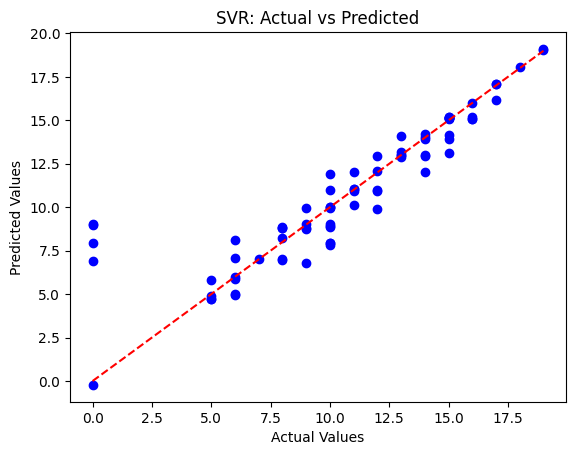

In [ ]:
# Plotting Actual vs Predicted values
plt.scatter(y_math_test, y_pred_svr, color='blue')
plt.plot([min(y_math_test), max(y_math_test)], [min(y_math_test), max(y_math_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted')
plt.show()


### **Interpretation**

The SVR model performs reasonably well with an R² of 0.79 being the best so far, to see wether we can improt it further we will Perform hyperparameter tuning using GridSearchCV—focusing on parameters such as **C, epsilon, kernel, and gamma—to** further enhance the SVR model's performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

# Create GridSearchCV
grid_search_svr = GridSearchCV(
    SVR(),
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search_svr.fit(X_math_train_scaled, y_math_train)

# Best model and evaluation
best_svr = grid_search_svr.best_estimator_
y_pred_best_svr = best_svr.predict(X_math_test_scaled)

# Metrics
mae = mean_absolute_error(y_math_test, y_pred_best_svr)
mse = mean_squared_error(y_math_test, y_pred_best_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_math_test, y_pred_best_svr)

# Print
print("Tuned SVR:")
print("Best Parameters:", grid_search_svr.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Tuned SVR:
Best Parameters: {'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
MAE: 1.07
MSE: 4.28
RMSE: 2.07
R²: 0.79


## Naive Bias Algorithm

### **Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


gnb = GaussianNB()
gnb.fit(X_math_train, y_math_train)

y_pred_NB = gnb.predict(X_math_test)



### **Evaluation**

In [ ]:
mae_NB = mean_absolute_error(y_math_test, y_pred_NB)
mse_NB = mean_squared_error(y_math_test, y_pred_NB)
rmse_NB = np.sqrt(mse_NB)
r2_NB = r2_score(y_math_test, y_pred_NB)


print(f"Mean Absolute Error (MAE): {mae_NB:.2f}")
print(f"Mean Squared Error (MSE): {mse_NB:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_NB:.2f}")
print(f"R² Score: {r2_NB:.2f}")


Mean Absolute Error (MAE): 3.66
Mean Squared Error (MSE): 25.89
Root Mean Squared Error (RMSE): 5.09
R² Score: -0.26


### **Interpretation**

The model performs poorly for this regression task. The high error values and the negative R² score indicate that the model is not suitable for predicting continuous final grades (G3). In fact, the negative R² suggests that this model performs worse than a simple mean prediction. This outcome is expected, as Gaussian Naïve Bayes is inherently a classification algorithm and does not handle continuous regression targets effectively.

Lets try to turn it into a classsification task and check the algorithm performance again

In [ ]:
# Convert G3 to binary classes
y_math_train_binary = (y_math_train >= 10).astype(int)
y_math_test_binary = (y_math_test >= 10).astype(int)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fit the model
gnb = GaussianNB()
gnb.fit(X_math_train, y_math_train_binary)

# Predict
y_pred_binary = gnb.predict(X_math_test)

# Evaluate
accuracy = accuracy_score(y_math_test_binary, y_pred_binary)
conf_matrix = confusion_matrix(y_math_test_binary, y_pred_binary)
report = classification_report(y_math_test_binary, y_pred_binary)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Accuracy: 0.85
Confusion Matrix:
 [[20  7]
 [ 5 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.87      0.90      0.89        52

    accuracy                           0.85        79
   macro avg       0.84      0.82      0.83        79
weighted avg       0.85      0.85      0.85        79



We reframed the task as binary classification (pass/fail), which aligns well with the strengths of Naïve Bayes.

With clear class boundaries (e.g., success = grade ≥ 10), the model could better capture the underlying class probabilities.

Simplifying the output space from continuous grades to two classes removed the regression complexity Naïve Bayes struggles with.



## Artificial Neural Networks (ANN)

### **Training**

For ANN first thing we did is that we built a simple ANN (64 → 32 → 1) with default Adam optimizer and 100 epochs.  
**the results**:  
MAE: 1.79
MSE: 7.29
RMSE: 2.70
R² Score: 0.64

In [ ]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_math_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_math_train_scaled, y_math_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)



y_pred_ann = model.predict(X_math_test_scaled).flatten()

# Evaluation metrics
mae_ann1 = mean_absolute_error(y_math_test, y_pred_ann)
mse_ann1 = mean_squared_error(y_math_test, y_pred_ann)
rmse_ann1 = np.sqrt(mse_ann1)
r2_ann1 = r2_score(y_math_test, y_pred_ann)

# Print results
print("\n ANN Regression Results:")
print(f"MAE: {mae_ann1:.2f}")
print(f"MSE: {mse_ann1:.2f}")
print(f"RMSE: {rmse_ann1:.2f}")
print(f"R² Score: {r2_ann1:.2f}")





Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 129.5464 - val_loss: 112.2508
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 109.2566 - val_loss: 92.4082
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 88.7079 - val_loss: 70.9744
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 65.6785 - val_loss: 48.4463
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 39.2474 - val_loss: 28.6343
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.4662 - val_loss: 16.2936
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.5040 - val_loss: 11.5509
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1197 - val_loss: 10.1073
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4584 - val_loss: 9.4181
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8623 - val_loss: 8.9039
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.9228 - val_loss: 8.4822
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 

### **Evaluation**

for further improvement we may consider

1.   **Dropout layers** are added after each Dense layer to help regularize the model.
2.   **Learning rate** scheduler adjusts the learning rate after every 10 epochs to potentially speed up convergence.
3. **Increased epochs** to 200 to allow the model to learn better.  
- **Results**: (Minor improvments)   
MAE: 1.95
MSE: 7.21
RMSE: 2.69
R² Score: 0.65









Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 111.9637 - val_loss: 92.1348 - learning_rate: 0.0010
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 87.1011 - val_loss: 69.5321 - learning_rate: 0.0010
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 58.4520 - val_loss: 45.7059 - learning_rate: 0.0010
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 37.7277 - val_loss: 25.1945 - learning_rate: 0.0010
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.8411 - val_loss: 14.8510 - learning_rate: 0.0010
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 14.3950 - val_loss: 11.3862 - learning_rate: 0.0010
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.6174 - val_loss: 10.5121 - learning_rate: 0.0010
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.7585 - val_loss: 9.6702 - learning_rate: 0.0010
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.4440 - val_loss: 9.3191 - learning_rate: 0.0

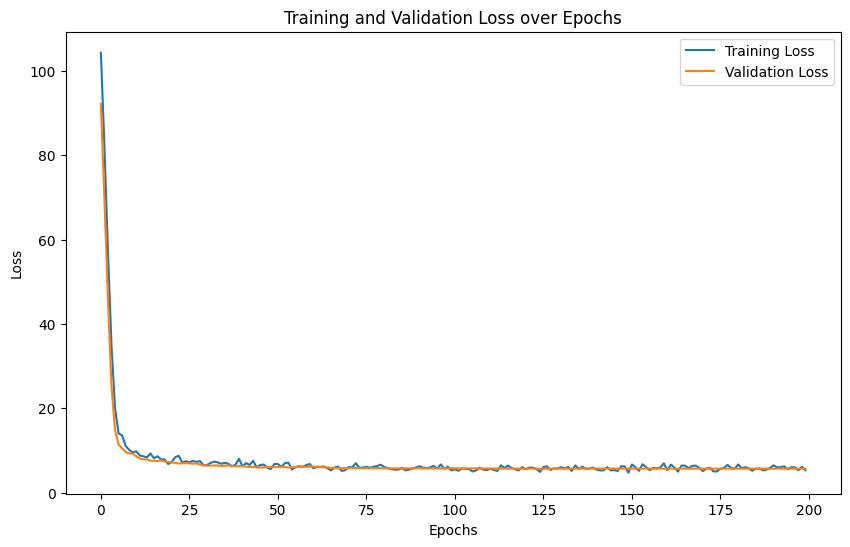

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

 ANN Regression Results:
MAE: 1.95
MSE: 6.82
RMSE: 2.61
R² Score: 0.67


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_math_train_scaled.shape[1],)),
    Dropout(0.2),  # Dropout layer to reduce overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),  # Another Dropout layer
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define learning rate scheduler
def scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:  # Reduce learning rate every 10 epochs
        lr = lr * 0.7
    return lr

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model with more epochs and the learning rate scheduler
history = model.fit(X_math_train_scaled, y_math_train, epochs=200, batch_size=16, validation_split=0.2, verbose=1, callbacks=[lr_scheduler])

# Plot training and validation loss
plt.figure(figsize=(10, 6))

# Plot loss for training and validation data
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and legend
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

# Predict on the test set
y_pred_ann = model.predict(X_math_test_scaled).flatten()

# Evaluation metrics
mae_ann = mean_absolute_error(y_math_test, y_pred_ann)
mse_ann = mean_squared_error(y_math_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
r2_ann = r2_score(y_math_test, y_pred_ann)

# Print results
print("\n ANN Regression Results:")
print(f"MAE: {mae_ann:.2f}")
print(f"MSE: {mse_ann:.2f}")
print(f"RMSE: {rmse_ann:.2f}")
print(f"R² Score: {r2_ann:.2f}")


### **Interpretation**


**Further improvments:**  
Our initial ANN model had an R² of **0.65** (decent but not great).  
We used **Optuna** to automatically find better hyperparameters.
Optuna automates the trial-and-error search for the best model settings.

**How?**  
1. **Tested 30 combinations** of:  
   - Hidden layer size  
   - Dropout rate  
   - Learning rate  
   - Batch size  
   - Training epochs  

2. **Goal**: Minimize prediction error (MSE) on validation data.  

**Result** :   
MAE: 1.77
MSE: 6.62
RMSE: 2.57
R² Score: 0.68
  

In [ ]:
!pip install optuna

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Split your training set again into a smaller training and validation set
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
    X_math_train_scaled, y_math_train, test_size=0.2, random_state=42
)

def objective(trial):
    # Suggest hyperparameters
    hidden_units = trial.suggest_categorical("hidden_units", [32, 64, 128])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32])
    epochs = trial.suggest_int("epochs", 50, 150)

    # Build model
    model = Sequential([
        Dense(hidden_units, activation='relu', input_shape=(X_train_sub.shape[1],)),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Train model
    model.fit(X_train_sub, y_train_sub,
              validation_data=(X_val_sub, y_val_sub),
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)

    # Predict and evaluate on validation set
    preds = model.predict(X_val_sub).flatten()
    mse = mean_squared_error(y_val_sub, preds)
    return mse  # we want to minimize MSE

# Run optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Print best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best validation MSE:", study.best_value)


[I 2025-05-14 13:40:00,599] A new study created in memory with name: no-name-55f4ca38-4dd0-4a79-9c05-1367964ec2cb


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-05-14 13:40:27,802] Trial 0 finished with value: 4.694082260131836 and parameters: {'hidden_units': 32, 'dropout_rate': 0.10222318353408313, 'learning_rate': 0.0038683763970832684, 'batch_size': 16, 'epochs': 141}. Best is trial 0 with value: 4.694082260131836.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2025-05-14 13:40:56,625] Trial 1 finished with value: 4.832176208496094 and parameters: {'hidden_units': 128, 'dropout_rate': 0.194090705750777, 'learning_rate': 0.001323300043434757, 'batch_size': 16, 'epochs': 147}. Best is trial 0 with value: 4.694082260131836.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-05-14 13:41:08,322] Trial 2 finished with value: 48.20537567138672 and parameters: {'hidden_units': 32, 'dropout_rate': 0.26777862876491354, 'learning_rate': 0.00012792482752190405, 'batch_size': 32, 'epochs': 69}. Best is trial 0 with value: 4.694082260131836.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-05-14 13:41:24,510] Trial 3 finished with value: 5.424458980560303 and parameters: {'hidden_units': 128, 'dropout_rate': 0.1017113001144518, 'learning_rate': 0.009521678872916656, 'batch_size': 32, 'epochs': 96}. Best is trial 0 with value: 4.694082260131836.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-05-14 13:41:38,508] Trial 4 finished with value: 5.700091361999512 and parameters: {'hidden_units': 128, 'dropout_rate': 0.3703341090170753, 'learning_rate': 0.0001576371932050381, 'batch_size': 16, 'epochs': 68}. Best is trial 0 with value: 4.694082260131836.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-05-14 13:41:54,636] Trial 5 finished with value: 4.779608726501465 and parameters: {'hidden_units': 32, 'dropout_rate': 0.17518375148011836, 'learning_rate': 0.0005368349277343725, 'batch_size': 16, 'epochs': 84}. Best is trial 0 with value: 4.694082260131836.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-05-14 13:42:15,692] Trial 6 finished with value: 4.184194564819336 and parameters: {'hidden_units': 128, 'dropout_rate': 0.43652762053127336, 'learning_rate': 0.000488289760999669, 'batch_size': 32, 'epochs': 135}. Best is trial 6 with value: 4.184194564819336.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-05-14 13:42:31,965] Trial 7 finished with value: 3.887136220932007 and parameters: {'hidden_units': 64, 'dropout_rate': 0.14455779983862566, 'learning_rate': 0.005625456296132384, 'batch_size': 32, 'epochs': 103}. Best is trial 7 with value: 3.887136220932007.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-05-14 13:42:43,019] Trial 8 finished with value: 5.792972564697266 and parameters: {'hidden_units': 32, 'dropout_rate': 0.410865411252857, 'learning_rate': 0.008285026849404424, 'batch_size': 32, 'epochs': 58}. Best is trial 7 with value: 3.887136220932007.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-05-14 13:42:59,240] Trial 9 finished with value: 3.9057703018188477 and parameters: {'hidden_units': 32, 'dropout_rate': 0.19706747564077276, 'learning_rate': 0.005671392133421511, 'batch_size': 16, 'epochs': 86}. Best is trial 7 with value: 3.887136220932007.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-05-14 13:43:20,296] Trial 10 finished with value: 3.7179017066955566 and parameters: {'hidden_units': 64, 'dropout_rate': 0.3178050626340965, 'learning_rate': 0.002177392403783967, 'batch_size': 32, 'epochs': 118}. Best is trial 10 with value: 3.7179017066955566.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-05-14 13:43:39,719] Trial 11 finished with value: 4.001117706298828 and parameters: {'hidden_units': 64, 'dropout_rate': 0.3163708448491127, 'learning_rate': 0.0023172537634132888, 'batch_size': 32, 'epochs': 117}. Best is trial 10 with value: 3.7179017066955566.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-05-14 13:43:58,345] Trial 12 finished with value: 4.135550498962402 and parameters: {'hidden_units': 64, 'dropout_rate': 0.2910770226697919, 'learning_rate': 0.0022588562358616185, 'batch_size': 32, 'epochs': 114}. Best is trial 10 with value: 3.7179017066955566.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2025-05-14 13:44:17,639] Trial 13 finished with value: 4.392572402954102 and parameters: {'hidden_units': 64, 'dropout_rate': 0.49354651107185604, 'learning_rate': 0.002560503206703602, 'batch_size': 32, 'epochs': 118}. Best is trial 10 with value: 3.7179017066955566.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-05-14 13:44:33,855] Trial 14 finished with value: 4.107189178466797 and parameters: {'hidden_units': 64, 'dropout_rate': 0.24794387007109625, 'learning_rate': 0.000983613094602559, 'batch_size': 32, 'epochs': 104}. Best is trial 10 with value: 3.7179017066955566.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-05-14 13:44:53,176] Trial 15 finished with value: 4.444446086883545 and parameters: {'hidden_units': 64, 'dropout_rate': 0.3346888357784471, 'learning_rate': 0.004129321434205533, 'batch_size': 32, 'epochs': 123}. Best is trial 10 with value: 3.7179017066955566.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-05-14 13:45:09,287] Trial 16 finished with value: 4.264550685882568 and parameters: {'hidden_units': 64, 'dropout_rate': 0.2389650440134541, 'learning_rate': 0.0013997541746645947, 'batch_size': 32, 'epochs': 102}. Best is trial 10 with value: 3.7179017066955566.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-05-14 13:45:30,925] Trial 17 finished with value: 5.115421295166016 and parameters: {'hidden_units': 64, 'dropout_rate': 0.15198980989818447, 'learning_rate': 0.005271314117866938, 'batch_size': 32, 'epochs': 130}. Best is trial 10 with value: 3.7179017066955566.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-05-14 13:45:45,739] Trial 18 finished with value: 4.741726398468018 and parameters: {'hidden_units': 64, 'dropout_rate': 0.3739334497785076, 'learning_rate': 0.0006568259525135001, 'batch_size': 32, 'epochs': 91}. Best is trial 10 with value: 3.7179017066955566.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-05-14 13:46:02,698] Trial 19 finished with value: 5.740333557128906 and parameters: {'hidden_units': 64, 'dropout_rate': 0.22109294790271017, 'learning_rate': 0.000282014351047519, 'batch_size': 32, 'epochs': 108}. Best is trial 10 with value: 3.7179017066955566.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2025-05-14 13:46:21,540] Trial 20 finished with value: 4.426740646362305 and parameters: {'hidden_units': 64, 'dropout_rate': 0.1349044023059791, 'learning_rate': 0.0026080578576728594, 'batch_size': 32, 'epochs': 126}. Best is trial 10 with value: 3.7179017066955566.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-05-14 13:46:36,235] Trial 21 finished with value: 3.442066192626953 and parameters: {'hidden_units': 32, 'dropout_rate': 0.2066418034824668, 'learning_rate': 0.005766374262435108, 'batch_size': 16, 'epochs': 83}. Best is trial 21 with value: 3.442066192626953.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-05-14 13:46:50,846] Trial 22 finished with value: 4.176586151123047 and parameters: {'hidden_units': 32, 'dropout_rate': 0.1498671055806605, 'learning_rate': 0.0070515829447386725, 'batch_size': 16, 'epochs': 78}. Best is trial 21 with value: 3.442066192626953.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2025-05-14 13:47:08,431] Trial 23 finished with value: 3.901663064956665 and parameters: {'hidden_units': 32, 'dropout_rate': 0.2793599951795005, 'learning_rate': 0.003733083448874251, 'batch_size': 16, 'epochs': 97}. Best is trial 21 with value: 3.442066192626953.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-05-14 13:47:18,674] Trial 24 finished with value: 3.647599697113037 and parameters: {'hidden_units': 64, 'dropout_rate': 0.21835049763444636, 'learning_rate': 0.0017979112248453178, 'batch_size': 16, 'epochs': 50}. Best is trial 21 with value: 3.442066192626953.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-05-14 13:47:31,491] Trial 25 finished with value: 4.212127208709717 and parameters: {'hidden_units': 32, 'dropout_rate': 0.21897071698395779, 'learning_rate': 0.001659398905049923, 'batch_size': 16, 'epochs': 71}. Best is trial 21 with value: 3.442066192626953.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-05-14 13:47:41,735] Trial 26 finished with value: 4.546030044555664 and parameters: {'hidden_units': 64, 'dropout_rate': 0.34390447950558856, 'learning_rate': 0.0008937873805917642, 'batch_size': 16, 'epochs': 52}. Best is trial 21 with value: 3.442066192626953.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-05-14 13:47:51,812] Trial 27 finished with value: 3.8814022541046143 and parameters: {'hidden_units': 64, 'dropout_rate': 0.25779816575504544, 'learning_rate': 0.0017696088982742534, 'batch_size': 16, 'epochs': 51}. Best is trial 21 with value: 3.442066192626953.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-05-14 13:48:03,422] Trial 28 finished with value: 4.82888126373291 and parameters: {'hidden_units': 128, 'dropout_rate': 0.31133471359401976, 'learning_rate': 0.0031276100459642015, 'batch_size': 16, 'epochs': 63}. Best is trial 21 with value: 3.442066192626953.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-05-14 13:48:17,726] Trial 29 finished with value: 3.9691243171691895 and parameters: {'hidden_units': 32, 'dropout_rate': 0.18475525313275618, 'learning_rate': 0.003980255169017096, 'batch_size': 16, 'epochs': 78}. Best is trial 21 with value: 3.442066192626953.


Best hyperparameters: {'hidden_units': 32, 'dropout_rate': 0.2066418034824668, 'learning_rate': 0.005766374262435108, 'batch_size': 16, 'epochs': 83}
Best validation MSE: 3.442066192626953


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Extract the best hyperparameters
best_params = study.best_params

# Build the final model using the best hyperparameters
final_model = Sequential([
    Dense(best_params['hidden_units'], activation='relu', input_shape=(X_math_train_scaled.shape[1],)),
    Dropout(best_params['dropout_rate']),
    Dense(best_params['hidden_units'] // 2, activation='relu'),
    Dropout(best_params['dropout_rate']),
    Dense(1)
])

# Compile the model
final_model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']),
                    loss='mean_squared_error')

# Train on the full training set (with validation split optional)
history = final_model.fit(
    X_math_train_scaled, y_math_train,
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    validation_split=0.2,  # optional
    verbose=1
)

# Predict on the test set
y_pred_final = final_model.predict(X_math_test_scaled).flatten()

# Evaluate
maefinalann = mean_absolute_error(y_math_test, y_pred_final)
msefinalann = mean_squared_error(y_math_test, y_pred_final)
rmsefinalann = np.sqrt(msefinalann)
r2finalann = r2_score(y_math_test, y_pred_final)

# Print metrics
print("\n Final Model Evaluation on Test Set:")
print(f"MAE: {maefinalann:.2f}")
print(f"MSE: {msefinalann:.2f}")
print(f"RMSE: {rmsefinalann:.2f}")
print(f"R² Score: {r2finalann:.2f}")


Epoch 1/83
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 104.9624 - val_loss: 55.2080
Epoch 2/83
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 37.6250 - val_loss: 13.7820
Epoch 3/83
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.6104 - val_loss: 9.6848
Epoch 4/83
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.3622 - val_loss: 10.1152
Epoch 5/83
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.3080 - val_loss: 8.1614
Epoch 6/83
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.3313 - val_loss: 7.8518
Epoch 7/83
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.4369 - val_loss: 7.8958
Epoch 8/83
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8779 - val_loss: 7.8194
Epoch 9/83
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8800 - val_loss: 7.0998
Epoch 10/83
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.1055 - val_loss: 7.3958
Epoch 11/83
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9138 - val_loss: 6.5010
Epoch 12/83
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - lo

## **Performance Comparison For Math Dataset**

In [ ]:
import pandas as pd

# Create a metrics dictionary using your variables
metrics = {
    "KNN": {
        "MAE": mae_knn,
        "MSE": mse_knn,
        "RMSE": rmse_knn,
        "R²": r2_knn
    },
    "Linear Regression": {
        "MAE": mae_lr,
        "MSE": mse_lr,
        "RMSE": rmse_lr,
        "R²": r2_lr
    },
    "Tuned Decision Tree": {
        "MAE": mae_best,
        "MSE": mse_best,
        "RMSE": rmse_best,
        "R²": r2_best
    },
    "Random Forest (G2)": {
        "MAE": mae_g2,
        "MSE": mse_g2,
        "RMSE": rmse_g2,
        "R²": r2_g2
    },
    "SVR": {
        "MAE": mae_svr,
        "MSE": mse_svr,
        "RMSE": rmse_svr,
        "R²": r2_svr
    },
    "Naive Bayes": {
        "MAE": mae_NB,
        "MSE": mse_NB,
        "RMSE": rmse_NB,
        "R²": r2_NB
    },
    "ANN (Optuna-tuned)": {
        "MAE": maefinalann,
        "MSE": msefinalann,
        "RMSE": rmsefinalann,
        "R²": r2finalann
    }
}

# Convert to DataFrame and format
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
metrics_df = metrics_df.round(2)  # Round to 2 decimal places

# Display the table
print("Model Performance Comparison:")
print(metrics_df)

# Optional: Highlight best/worst performers (for Jupyter Notebook)
def highlight_extremes(col):
    if col.name == 'R²':
        # Highlight max R² in green
        return ['background-color: limegreen' if x == col.max() else '' for x in col]
    else:
        # Highlight min errors in yellow
        return ['background-color: gold' if x == col.min() else '' for x in col]

# For Jupyter: metrics_df.style.apply(highlight_extremes)

Model Performance Comparison:
                      MAE    MSE  RMSE    R²
KNN                  2.27   9.66  3.11  0.53
Linear Regression    1.49   5.26  2.29  0.74
Tuned Decision Tree  1.33   4.96  2.23  0.76
Random Forest (G2)   1.34   4.82  2.20  0.76
SVR                  1.04   4.29  2.07  0.79
Naive Bayes          3.66  25.89  5.09 -0.26
ANN (Optuna-tuned)   1.83   7.15  2.67  0.65


<Figure size 1000x600 with 0 Axes>

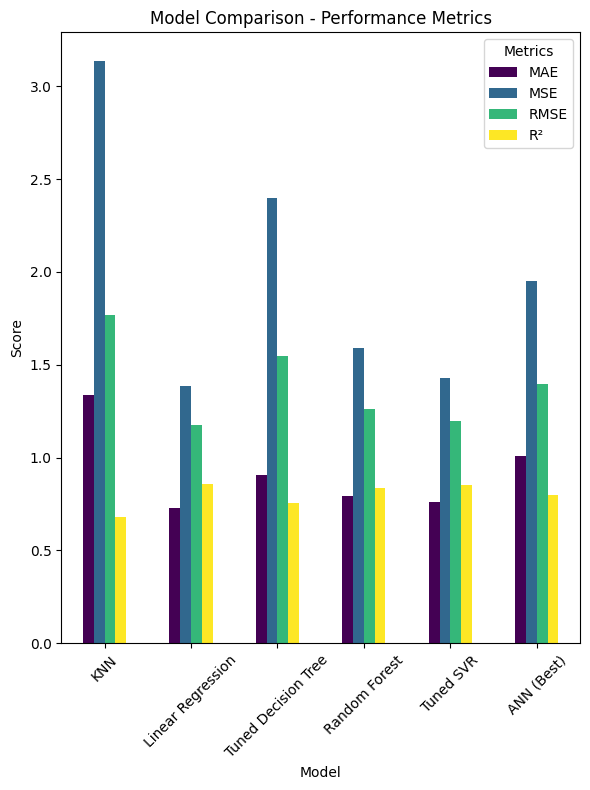

In [ ]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the performance metrics
df_metrics.plot(kind="bar", figsize=(6, 8), colormap="viridis")

# Customize the plot
plt.title("Model Comparison - Performance Metrics")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.tight_layout()

# Show the plot
plt.show()


## Overall Comparison and Recommendation


- **SVR** achieved the best results  
  - *MAE*: 1.04, *R²*: 0.79  
  - Strongest predictive power overall.

- **Random Forest (G2)** and **Decision Tree** performed similarly  
  - *R²*: ~0.76  
  - Effective at capturing feature interactions.

- **Linear Regression**  
  - *R²*: 0.74  
  - Decent baseline but outperformed by complex models.

- **ANN** (Artificial Neural Network)  
  - *R²*: 0.68  
  - Underperformed, suggesting need for better tuning.

- **K-Nearest Neighbors (KNN)**  
  - *R²*: 0.53  
  - Weaker performance due to limitations in handling continuous output.

- **Naive Bayes**  
  - *R²*: -0.26  
  - Not suitable for regression tasks.

### Conclusion
SVR and tree-based models are best suited for this problem. ANN requires further optimization, while simpler models like KNN and Naive Bayes are not effective.


# TRAINING THE PORTUGESE DATASET

we first scale our data

In [ ]:

# Scale the features
scaler = StandardScaler()
X_por_train_scaled = scaler.fit_transform(X_por_train)
X_por_test_scaled = scaler.transform(X_por_test)

## KNN Algorithm

### Training

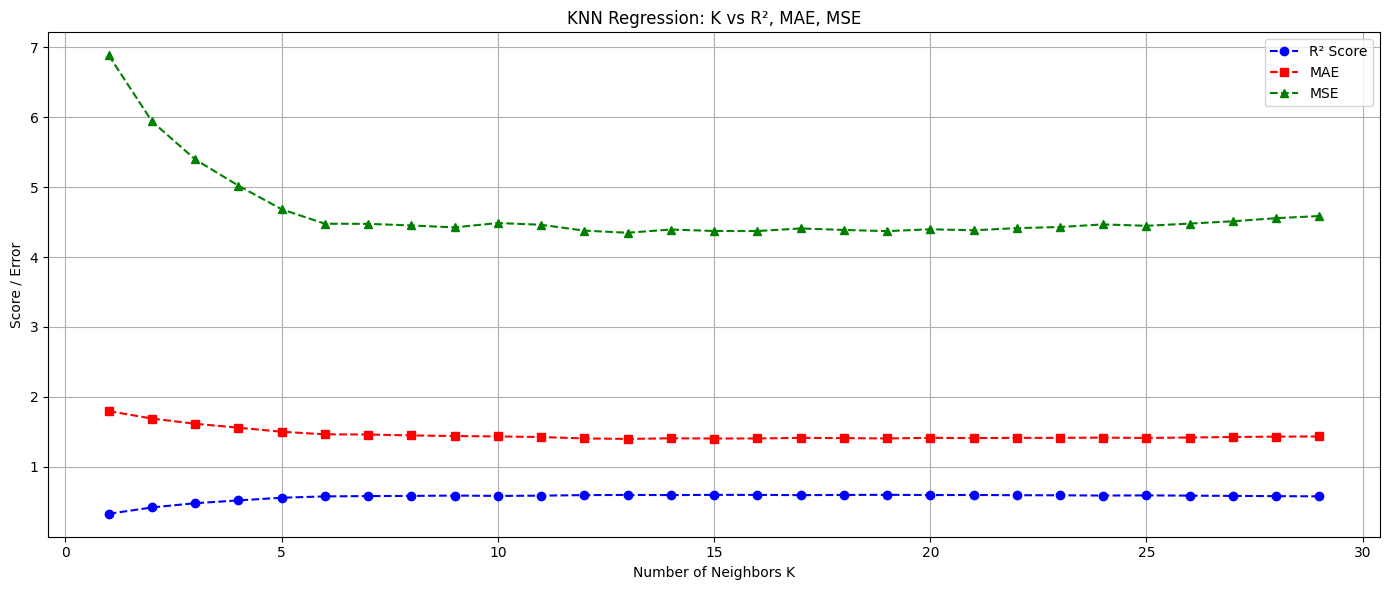

In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
# Range of neighbors to test
neighbors = range(1, 30)

# Lists to store cross-validation scores
r2_scores = []
mae_scores = []
mse_scores = []

# Custom scorers (negated because scikit-learn expects higher = better)
neg_mae = make_scorer(mean_absolute_error, greater_is_better=False)
neg_mse = make_scorer(mean_squared_error, greater_is_better=False)

# Perform 10-fold cross-validation for each number of neighbors
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)

    r2 = cross_val_score(knn, X_por_train_scaled, y_por_train, cv=10, scoring='r2').mean()
    mae = -cross_val_score(knn, X_por_train_scaled, y_por_train, cv=10, scoring=neg_mae).mean()
    mse = -cross_val_score(knn, X_por_train_scaled, y_por_train, cv=10, scoring=neg_mse).mean()

    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)

# Plot all metrics
plt.figure(figsize=(14, 6))

plt.plot(neighbors, r2_scores, label='R² Score', marker='o', linestyle='dashed', color='b')
plt.plot(neighbors, mae_scores, label='MAE', marker='s', linestyle='dashed', color='r')
plt.plot(neighbors, mse_scores, label='MSE', marker='^', linestyle='dashed', color='g')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Score / Error')
plt.title('KNN Regression: K vs R², MAE, MSE')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# Convert neighbors to a list if it's a range
neighbors_list = list(neighbors)

# Best K by R²
best_k_r2_index = np.argmax(r2_scores)
best_k_r2 = neighbors_list[best_k_r2_index]
best_r2 = r2_scores[best_k_r2_index]

# Best K by MAE
best_k_mae_index = np.argmin(mae_scores)
best_k_mae = neighbors_list[best_k_mae_index]
best_mae = mae_scores[best_k_mae_index]

# Best K by MSE
best_k_mse_index = np.argmin(mse_scores)
best_k_mse = neighbors_list[best_k_mse_index]
best_mse = mse_scores[best_k_mse_index]

# Print results
print(f"Best K by R² : {best_k_r2}, R² Score = {best_r2:.4f}")
print(f"Best K by MAE: {best_k_mae}, MAE = {best_mae:.4f}")
print(f"Best K by MSE: {best_k_mse}, MSE = {best_mse:.4f}")


Best K by R² : 19, R² Score = 0.5995
Best K by MAE: 13, MAE = 1.3992
Best K by MSE: 13, MSE = 4.3484


looks like k = 13 is best, we'll try to set it as 13


In [ ]:
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_por_train_scaled, y_por_train)
y_pred_knn = knn.predict(X_por_test_scaled)


### Evaluation

In [ ]:
# Evaluate
mae_knn_por = mean_absolute_error(y_por_test, y_pred_knn)
mse_knn_por = mean_squared_error(y_por_test, y_pred_knn)
rmse_knn_por = np.sqrt(mse_knn_por)
r2_knn_por = r2_score(y_por_test, y_pred_knn)

print(f"Mean Absolute Error (MAE): {mae_knn_por:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn_por:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn_por:.2f}")
print(f"R² Score: {r2_knn_por:.2f}")


Mean Absolute Error (MAE): 1.34
Mean Squared Error (MSE): 3.13
Root Mean Squared Error (RMSE): 1.77
R² Score: 0.68


### Interpretation

KNN showed limited predictive power, confirming its weakness in handling continuous regression tasks.









## Linear Regression Algorithm

### training

In [ ]:
lr = LinearRegression()

lr.fit(X_por_train_scaled, y_por_train)

y_pred_lr = lr.predict(X_por_test_scaled)

### Evaluation

In [ ]:
# Evaluating the model with 'por' prefix
mae_por_lr = mean_absolute_error(y_por_test, y_pred_lr)
mse_por_lr = mean_squared_error(y_por_test, y_pred_lr)
rmse_por_lr = np.sqrt(mse_por_lr)
r2_por_lr = r2_score(y_por_test, y_pred_lr)

# Printing the results with 'por' prefix
print(f"Mean Absolute Error (MAE): {mae_por_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_por_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_por_lr:.2f}")
print(f"R² Score: {r2_por_lr:.2f}")


Mean Absolute Error (MAE): 0.73
Mean Squared Error (MSE): 1.39
Root Mean Squared Error (RMSE): 1.18
R² Score: 0.86


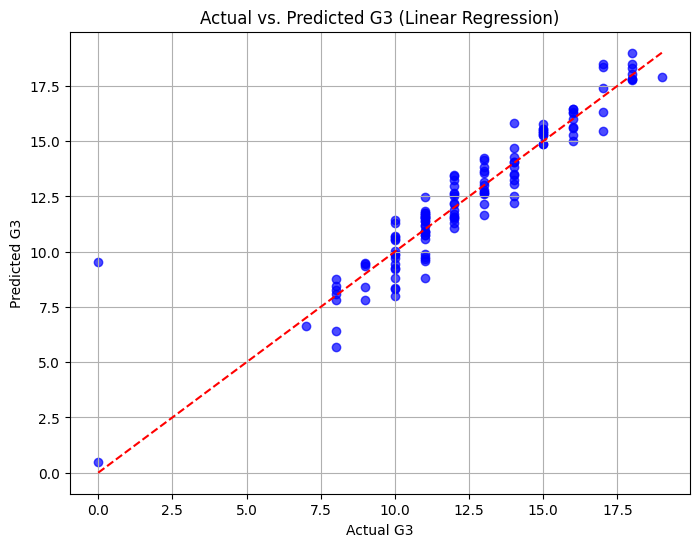

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_por_test, y_pred_lr, alpha=0.7, color='blue')
plt.plot([y_por_test.min(), y_por_test.max()], [y_por_test.min(), y_por_test.max()], '--r')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs. Predicted G3 (Linear Regression)")
plt.grid(True)
plt.show()

### Interpretation

Linear Regression performs strongly on this dataset, achieving a high R² score of 0.86, indicating a good fit and strong linear relationship between features and target.


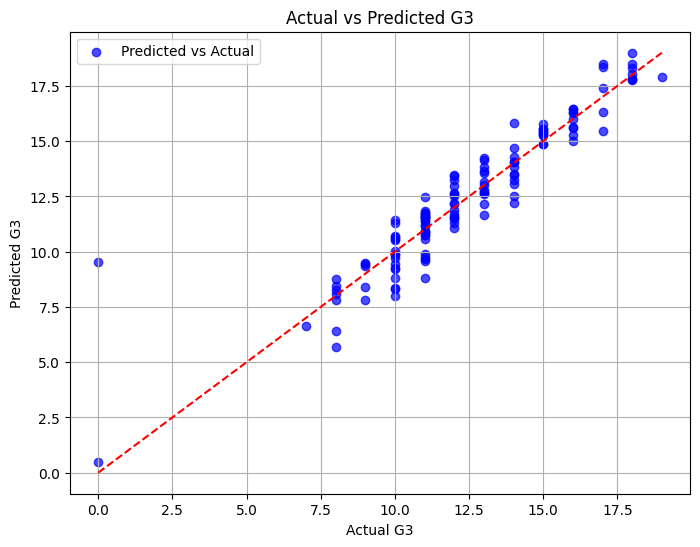

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_por_test, y_pred_lr, color='blue', alpha=0.7, label="Predicted vs Actual")
plt.plot([y_por_test.min(), y_por_test.max()], [y_por_test.min(), y_por_test.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted G3")
plt.legend()
plt.grid(True)
plt.show()



## Decision Tree Regression Algorithm

### Training

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_por_train, y_por_train)
y_pred_dt = dt_regressor.predict(X_por_test)

### Evaluation

In [ ]:
# Por Model Evaluation Metrics for Decision Tree
por_mae_dt = mean_absolute_error(y_por_test, y_pred_dt)
por_mse_dt = mean_squared_error(y_por_test, y_pred_dt)
por_rmse_dt = np.sqrt(por_mse_dt)
por_r2_dt = r2_score(y_por_test, y_pred_dt)

# Print results
print(f"Por MAE: {por_mae_dt:.2f}")
print(f"Por MSE: {por_mse_dt:.2f}")
print(f"Por RMSE: {por_rmse_dt:.2f}")
print(f"Por R²: {por_r2_dt:.2f}")


Por MAE: 0.93
Por MSE: 2.55
Por RMSE: 1.60
Por R²: 0.74


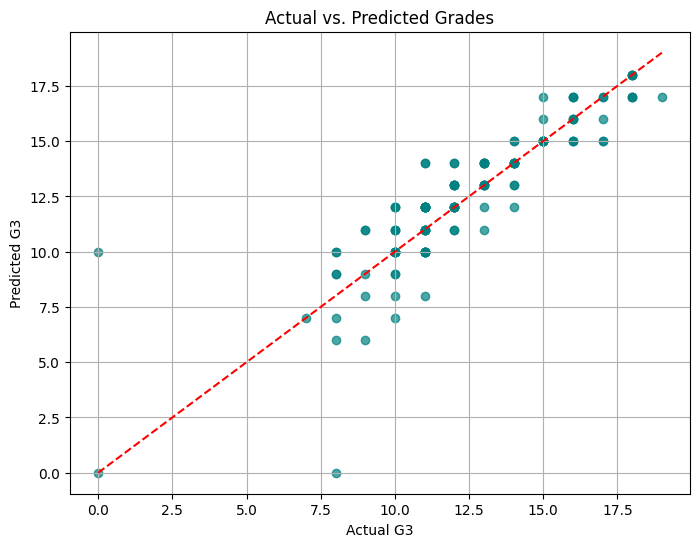

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_por_test, y_pred_dt, alpha=0.7, color='teal')
plt.plot([y_por_test.min(), y_por_test.max()], [y_por_test.min(), y_por_test.max()], 'r--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs. Predicted Grades")
plt.grid(True)
plt.show()


### Interpretation

To tune the Decision Tree model, we will use Grid Search to optimize hyperparameters such as max_depth, min_samples_split, and min_samples_leaf for better performance

In [ ]:
# Fit on training data with GridSearch
grid_search_dt.fit(X_por_train, y_por_train)

# Best model after GridSearch
best_dt = grid_search_dt.best_estimator_

# Evaluate on test set
y_pred_best_dt = best_dt.predict(X_por_test)  # Use X_por_test here
# Evaluate the model with 'por' prefix for tuned Decision Tree
mae_por_dt_tuned = mean_absolute_error(y_por_test, y_pred_best_dt)
mse_por_dt_tuned = mean_squared_error(y_por_test, y_pred_best_dt)
rmse_por_dt_tuned = np.sqrt(mse_por_dt_tuned)
r2_por_dt_tuned = r2_score(y_por_test, y_pred_best_dt)

# Printing the results with 'por' prefix for tuned Decision Tree
print("Tuned Decision Tree:")
print("Best Parameters:", grid_search_dt.best_params_)
print(f"Mean Absolute Error (MAE) for Tuned Decision Tree: {mae_por_dt_tuned:.2f}")
print(f"Mean Squared Error (MSE) for Tuned Decision Tree: {mse_por_dt_tuned:.2f}")
print(f"R² Score for Tuned Decision Tree: {r2_por_dt_tuned:.2f}")



Tuned Decision Tree:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean Absolute Error (MAE) for Tuned Decision Tree: 0.91
Mean Squared Error (MSE) for Tuned Decision Tree: 2.40
R² Score for Tuned Decision Tree: 0.75


After we tuned the Decision Tree model using Grid Search, This improved the R² score from 0.74 to 0.75, indicating a slight performance boost.

## Random Forest Algorithm

### Training

In [ ]:

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_por_train, y_por_train)

# Predict
y_pred_rf = rf_model.predict(X_por_test)



### Evaluation

In [ ]:
# Por Model Evaluation Metrics
por_mae_rf = mean_absolute_error(y_por_test, y_pred_rf)
por_mse_rf = mean_squared_error(y_por_test, y_pred_rf)
por_rmse_rf = np.sqrt(por_mse_rf)
por_r2_rf = r2_score(y_por_test, y_pred_rf)

# Print results
print(f"Por MAE: {por_mae_rf:.2f}")
print(f"Por MSE: {por_mse_rf:.2f}")
print(f"Por RMSE: {por_rmse_rf:.2f}")
print(f"Por R²: {por_r2_rf:.2f}")


Por MAE: 0.79
Por MSE: 1.59
Por RMSE: 1.26
Por R²: 0.84


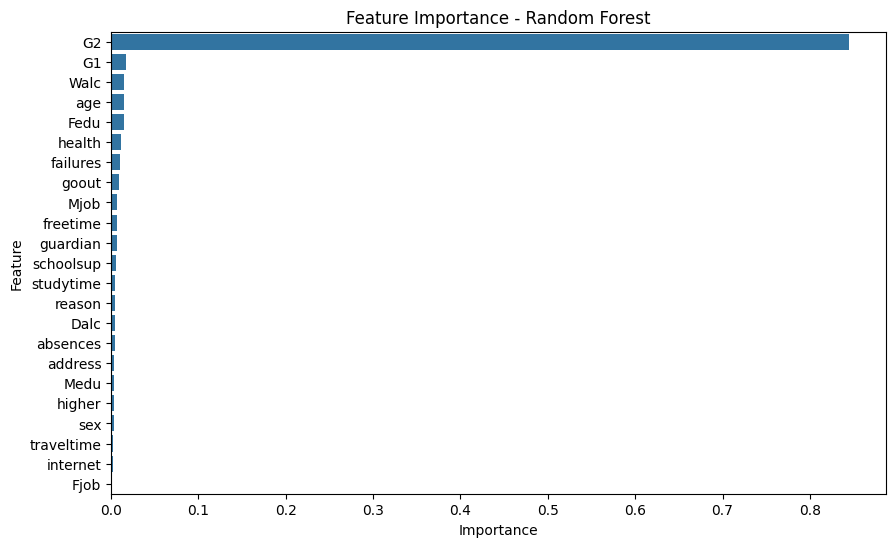

In [ ]:
# Import necessary library
import seaborn as sns

# Fit the Random Forest model again (if not already done)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_math_train_scaled, y_math_train)

# Get feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easier visualization
importances_df = pd.DataFrame({
    'Feature': X_math_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importance - Random Forest')
plt.show()


### Interpretation


- **MAE**: 0.79  
- **MSE**: 1.59  
- **RMSE**: 1.26  
- **R²**: 0.84  

**Comparison with Previous Models:**
- **Linear Regression**: R² = 0.86 (slightly better)
- **Decision Tree**: R² = 0.75 (lower performance)

Random Forest offers a good balance, outperforming Decision Tree and showing solid performance close to Linear Regression.


## SVM Algorithm

### training

In [ ]:
# Initialize the Support Vector Regressor model
svr = SVR(kernel='rbf')  # Using Radial Basis Function kernel, you can experiment with others like 'linear'

# Train the model
svr.fit(X_por_train_scaled, y_por_train)

# Make predictions
y_pred_svr = svr.predict(X_por_test_scaled)


### evaluation

In [ ]:
# Evaluating the model
mae_svr = mean_absolute_error(y_por_test, y_pred_svr)
mse_svr = mean_squared_error(y_por_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_por_test, y_pred_svr)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R² Score: {r2_svr:.2f}")


Mean Absolute Error (MAE): 1.00
Mean Squared Error (MSE): 2.37
Root Mean Squared Error (RMSE): 1.54
R² Score: 0.76


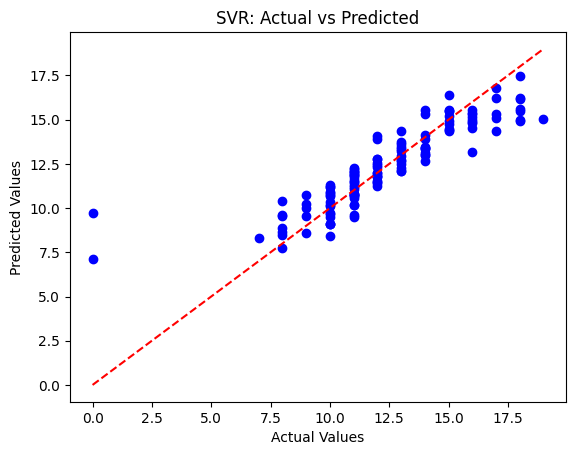

In [ ]:
# Plotting Actual vs Predicted values
plt.scatter(y_por_test, y_pred_svr, color='blue')
plt.plot([min(y_por_test), max(y_por_test)], [min(y_por_test), max(y_por_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Actual vs Predicted')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define parameter grid
param_grid_svr = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'epsilon': [0.1, 0.2, 0.5, 1],  # Epsilon-tube within which no penalty is associated
    'kernel': ['rbf']               # You can also try 'linear', 'poly'
}

# Initialize SVR
svr = SVR()

# Set up GridSearch
grid_search_svr = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the model
grid_search_svr.fit(X_por_train_scaled, y_por_train)

# Get the best estimator
best_svr = grid_search_svr.best_estimator_

# Predict using the best model
y_pred_best_svr = best_svr.predict(X_por_test_scaled)

# Evaluate
mae_por_best_svr = mean_absolute_error(y_por_test, y_pred_best_svr)
mse_por_best_svr = mean_squared_error(y_por_test, y_pred_best_svr)
rmse_por_best_svr = np.sqrt(mse_por_best_svr)
r2_por_best_svr = r2_score(y_por_test, y_pred_best_svr)

# Print results
print("Tuned SVR:")
print("Best Parameters:", grid_search_svr.best_params_)
print(f"Mean Absolute Error (MAE) for Tuned SVR (por): {mae_por_best_svr:.2f}")
print(f"Mean Squared Error (MSE) for Tuned SVR (por): {mse_por_best_svr:.2f}")
print(f"Root Mean Squared Error (RMSE) for Tuned SVR (por): {rmse_por_best_svr:.2f}")
print(f"R² Score for Tuned SVR (por): {r2_por_best_svr:.2f}")



Tuned SVR:
Best Parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Absolute Error (MAE) for Tuned SVR (por): 0.76
Mean Squared Error (MSE) for Tuned SVR (por): 1.43
Root Mean Squared Error (RMSE) for Tuned SVR (por): 1.20
R² Score for Tuned SVR (por): 0.85


Tuning significantly improved SVR's performance — the R² score increased from 0.76 to 0.85, outperforming the Decision Tree and nearly matching the performance of the Random Forest model. This shows that, with proper tuning, SVR can model non-linear relationships quite effectively on this dataset.

## Naive Bias Algorithm

### training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


gnb = GaussianNB()
gnb.fit(X_por_train, y_por_train)

y_pred_NB = gnb.predict(X_por_test)



### evaluation

In [ ]:
mae_por_NB = mean_absolute_error(y_por_test, y_pred_NB)
mse_por_NB = mean_squared_error(y_por_test, y_pred_NB)
rmse_por_NB = np.sqrt(mse_por_NB)
r2_por_NB = r2_score(y_por_test, y_pred_NB)

print(f"Mean Absolute Error (MAE) for Naive Bayes (por): {mae_por_NB:.2f}")
print(f"Mean Squared Error (MSE) for Naive Bayes (por): {mse_por_NB:.2f}")
print(f"Root Mean Squared Error (RMSE) for Naive Bayes (por): {rmse_por_NB:.2f}")
print(f"R² Score for Naive Bayes (por): {r2_por_NB:.2f}")


Mean Absolute Error (MAE) for Naive Bayes (por): 3.56
Mean Squared Error (MSE) for Naive Bayes (por): 19.44
Root Mean Squared Error (RMSE) for Naive Bayes (por): 4.41
R² Score for Naive Bayes (por): -0.99


### Interpretation

Gaussian Naive Bayes performed poorly (R² = -0.99), confirming it's not suitable for this regression task.  
we will do the same as we did for math, we convert it to a classification task and test the accuracy

In [ ]:
# Convert target values to binary: 1 if G3 > 10 (pass), 0 otherwise (fail)
y_por_train_class = (y_por_train > 10).astype(int)
y_por_test_class = (y_por_test > 10).astype(int)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train
gnb = GaussianNB()
gnb.fit(X_por_train, y_por_train_class)

# Predict
y_pred_class = gnb.predict(X_por_test)

# Evaluate
accuracy = accuracy_score(y_por_test_class, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_por_test_class, y_pred_class))


Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.94      0.92      0.93        98

    accuracy                           0.89       130
   macro avg       0.85      0.87      0.86       130
weighted avg       0.89      0.89      0.89       130



The Naive Bayes classifier achieved 89% accuracy, with a strong precision and recall for predicting students passing (1). It shows effective performance in the binary classification of pass/fail based on G3

# Artificial Neural Networks

## training

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and train the model
ann_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
ann_regressor.fit(X_por_train_scaled, y_por_train)

# Predict
y_pred_ann = ann_regressor.predict(X_por_test_scaled)




### evaluate

In [ ]:
# Evaluate
mae_ann = mean_absolute_error(y_por_test, y_pred_ann)
mse_ann = mean_squared_error(y_por_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
r2_ann = r2_score(y_por_test, y_pred_ann)

print(f"MAE: {mae_ann:.2f}")
print(f"MSE: {mse_ann:.2f}")
print(f"RMSE: {rmse_ann:.2f}")
print(f"R²: {r2_ann:.2f}")

MAE: 1.20
MSE: 2.60
RMSE: 1.61
R²: 0.73


In [ ]:

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_por_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_por_train_scaled, y_por_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# Por Ann Best Model Evaluation
por_ann_best_mse = mean_squared_error(y_por_test, y_pred)
por_ann_best_mae = mean_absolute_error(y_por_test, y_pred)
por_ann_best_r2 = r2_score(y_por_test, y_pred)

print(f"Por Ann Best Model Test MSE : {por_ann_best_mse:.4f}")
print(f"Por Ann Best Model Test MAE : {por_ann_best_mae:.4f}")
print(f"Por Ann Best Model Test R²  : {por_ann_best_r2:.4f}")



Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 136.0298 - mae: 11.2185 - val_loss: 104.5307 - val_mae: 9.9051
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87.2687 - mae: 8.8499 - val_loss: 52.1673 - val_mae: 6.8158
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.0461 - mae: 5.6899 - val_loss: 13.4592 - val_mae: 3.0463
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.5941 - mae: 3.0299 - val_loss: 6.2487 - val_mae: 1.8217
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5872 - mae: 2.3241 - val_loss: 4.5059 - val_mae: 1.5391
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2139 - mae: 2.0644 - val_loss: 3.6398 - val_mae: 1.3763
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3153 - mae: 2.0730 - val_loss: 3.0379 - val_mae: 1.2547
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4164 - mae: 1.8738 - val_loss: 2.6984 - val_mae: 1.1834
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - 

We tested both models—MLPRegressor and a Sequential Neural Network. MLPRegressor was simple to use but lacked customization and early stopping. The Sequential Neural Network gave us more flexibility, with custom layers and early stopping, making it more suitable for complex tasks.


## Performance Comparison

In [ ]:
import pandas as pd

# Define the metrics for each model using POR variables
metrics = {
    "Model": ["KNN", "Linear Regression", "Tuned Decision Tree",
              "Random Forest", "Tuned SVR", "ANN (Best)"],
    "MAE": [mae_knn_por, mae_por_lr, mae_por_dt_tuned,
            por_mae_rf, mae_por_best_svr, por_ann_best_mae],
    "MSE": [mse_knn_por, mse_por_lr, mse_por_dt_tuned,
            por_mse_rf, mse_por_best_svr, por_ann_best_mse],
    "RMSE": [rmse_knn_por, rmse_por_lr, np.sqrt(mse_por_dt_tuned),
             por_rmse_rf, rmse_por_best_svr, np.sqrt(por_ann_best_mse)],
    "R²": [r2_knn_por, r2_por_lr, r2_por_dt_tuned,
           por_r2_rf, r2_por_best_svr, por_ann_best_r2]
}

# Convert to DataFrame and format
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model", inplace=True)
df_metrics = df_metrics.round(3)  # Round to 3 decimal places for consistency

# Display the comparison table
print("Portuguese Dataset Model Performance Comparison:")
print(df_metrics)

# Optional: Save to CSV
df_metrics.to_csv("por_model_performance.csv")

Portuguese Dataset Model Performance Comparison:
                       MAE    MSE   RMSE     R²
Model                                          
KNN                  1.339  3.134  1.770  0.679
Linear Regression    0.731  1.387  1.178  0.858
Tuned Decision Tree  0.905  2.401  1.549  0.754
Random Forest        0.792  1.589  1.261  0.837
Tuned SVR            0.760  1.430  1.196  0.853
ANN (Best)           1.008  1.949  1.396  0.800


<Figure size 1000x600 with 0 Axes>

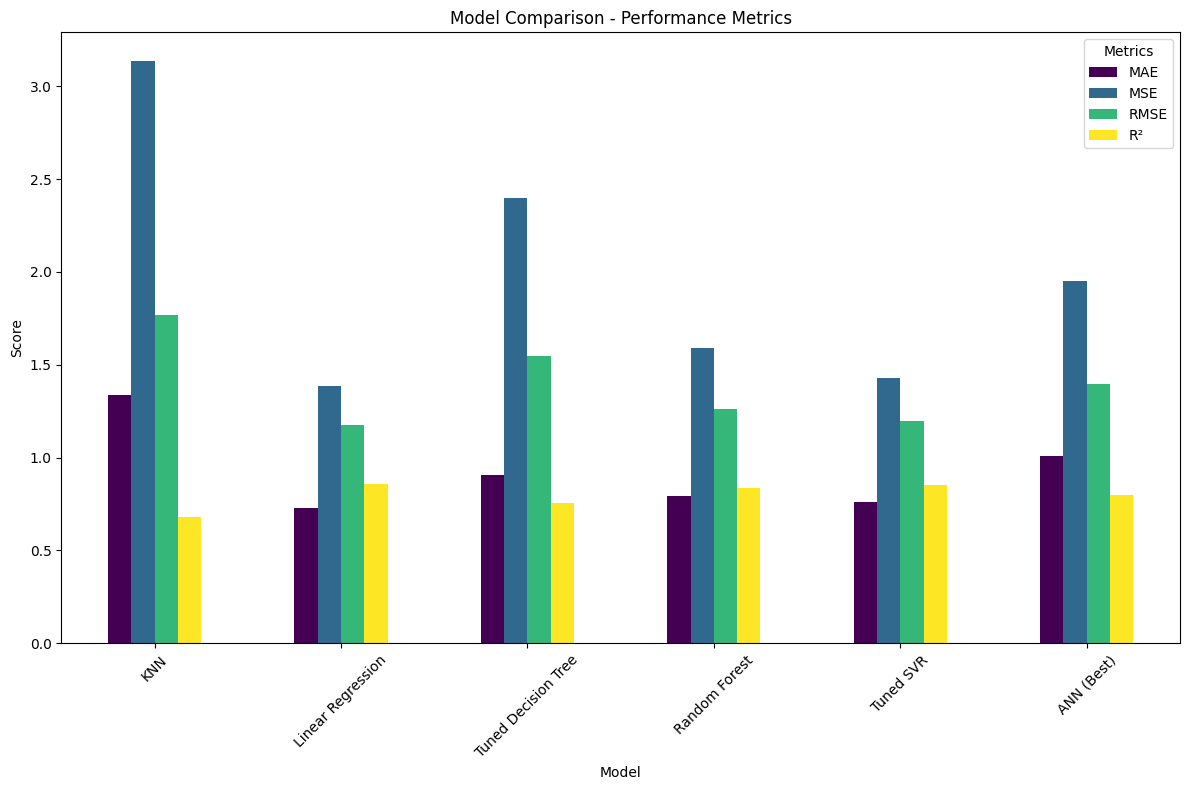

In [ ]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the performance metrics
df_metrics.plot(kind="bar", figsize=(12, 8), colormap="viridis")

# Customize the plot
plt.title("Model Comparison - Performance Metrics")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.tight_layout()

# Show the plot
plt.show()
